# MISK ACADEMY
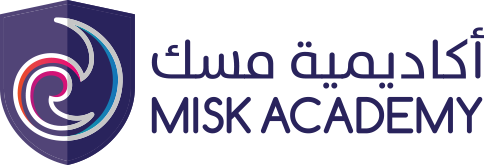  

# GENERAL ASSEMBLY
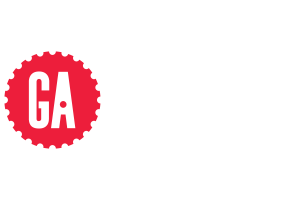  

# A Short-Term Forecasting Model for WTI Oil Prices

# 1. INTRODUCTION

Crude oil is one of the most important commodity that power the engine driving forces of  global economy.
There is no doubt that crude oil price forecasts are very useful to industries, governments as well as individuals. However, because of the high volatility of oil prices, it remains one of the most challenging forecasting problems. 

This study deals with the US oil market for many reasons such as:
1. The US is the world's largest economy by nominal GDP, Saudi Arabia and United States enjoy a strong economic relationship. 
2. Saudi Arabia’s currency is pegged with US dollar.. and most of the country’s revenues like crude oil are dependent on dollar movement
3. WTI is one of  benchmark crude oils that serves as a reference price, so it is suitable to study and analyze the factors that affect the price of WTI crude oil, conduct descriptive data analysis and forecast WTI price using time-series.

# 2. Problem Statment

- Identify factors that affect the price of WTI crude oil 
- Obtain a reliable forecast model of crude oil prices. 
- To achieve this goal, we perform a number of tasks: 
 1. Study the factors influencing the price of crude oil. 
 2. Consider the method of forecasting using time-series. 
 3. Collect and conduct descriptive data analysis.

# 3. THEORETICAL BACKGROUND
This study deals with the US market and WTI crude oil prices, we have provided two kind of time series models: 
First one is a univariate time series which refers to a time series that consists of single observations recorded sequentially over equal time increments. We have used monthly wti spot price data to forecast the price using three kind of time series which are ARIMA, SARIMA and RNN.
Second one is a Multivariate time series which has more than one variable. Each variable depends not only on its past values but also has some dependency on other variables. We have used monthly data for 20 independent variables and one dependent variable which is wti spot price to predict price using three kind of Multivariate time series which are  SARIMAX, VAR and NN.

In [6]:
# Load baisce
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from pmdarima import auto_arima 

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Load error evaluation measures
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import datetime
from IPython.display import Image

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


# 4. Data Collection

The dataset consists twenty independent variables and one dependent variable. Data were collected on a monthly frequency from January 1986 to August 2019.
Data was collected from several websites
1. U.S. Energy Information Administration (EIA)
2. Federal Reserve Bank of St. Louis
3. Yahoo! Finance
4. Organization of the Petroleum Exporting Countries (OPEC)
5. Baker Hughes Rig Count
6. King Abdullah Petroleum Studies and Research Center (KAPSARC).

# 5. Features Engineering:
As you know Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.
After researching, studying the factors influencing the price of crude oil, reading literature reviews, and getting  consulting expert, we decided to work with specific variables.
Some important data was published on a weekly, quarterly, or yearly  frequency. So we converted it to a monthly frequency.

|Feature|Feature Name on DF||Description|
|---|---|---|---|
|Crude Oil Import|Imports|U.S. imports of crude stocks from all sources recorded in thousands of barrels per month|
|Population|Poplin|U.S. population estimates per month|
|Products Supplied|Prod_Supp|U.S. product supplied of crude oil and petroleum products in thousand of barrels per month. The products supplied in the U.S. is an indication of the domestic demand for crude oil.|
|Crude production|Prodn|U.S. field production of crude oil in thousands of barrels per month.|
|Crude exports|Exports| US exports of crude oil in thousands of barrels per month Exports are an indication of excess capacity or ability to supply|
|operable capacity|Op_Cap|U.S. operable crude oil distillation capacity in thousands of barrels per month. The amount of crude oil that can be distilled contributes to the domestic supply of crude oil.|
|Crude Ending stocks|Cru_End_Stk|U.S. stocks of crude oil reported in thousands of barrels for the end of month.|
|Refinery Stocks|Ref_stk|U.S. stocks of crude oil held at refineries reported in thousands of barrels for the end of month.|
|Stocks in tank farms and pipes|FM_Pipes|U.S. stocks of crude oil held at tank farms and in pipelines in thousands of barrels for the end of month.|
|U.S. Ending Stocks of Crude Oil in SPR|End_Stk_SPR|U.S. Ending Stocks of Crude Oil in SPR (Thousand Barrels)|
|U.S. Ending Stocks of Crude Oil and Petroleum Products |Cru&Petrm_End_Stk| U.S. Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels)|
|U.S. Crude Oil Rigs Count|Rigs_Count|U.S. Crude Oil Rotary Rigs in Operation (Count)|
|NYSE Oil and Gas Index|XOI|NYSE oil and gas index, often referred to as ARCA index The number is monthly average.|
|S&P 500|S&P| S&P 500 index, averaged monthly.|
|Consumer Price Index| CPI| Consumer price index for all urban consumers for all items - seasonally adjusted|
|US GDP|US_GDP| US GDP|
|World Real GDP Growth|gdp_gr|Number of driving licenses issued per region per year|
|U.S. Crude Oil Imported Acquisition Cost|Cru_Imp_Cost | U.S. Crude Oil Imported Acquisition Cost by Refiners (Dollars per Barrel)|
|Brent Spot Price|Brent_Price| Brent Spot Price (Dollars per Barrel)|
| WTI Spot Price| WTI_Price | WTI Spot Price (Dollars per Barrel)|




In [7]:
df_monthly = pd.read_csv('monthlydata.csv',index_col='Date',parse_dates=True)
df_monthly.index.freq = 'MS'

In [8]:
df_monthly.head()

,Prod_Supp,Poplin,Imports,Prodn,Exports,Op_Cap,End_Stk_SPR,Ref_stk,FM_Pipes,Cru&Petrm_End_Stk,Rigs_Count,s&p,XOI,CPI,WTI_Price,Cru_Imp_Cost,Brent_Price
Date,,,,,,,,,,,,,,,,,
1986-01-01,498728,239713.0,107627,283248,4918,15459,494392,93009,187520,1535313,626,211.779999,124.059998,109.9,22.93,24.93,18.58
1986-02-01,453209,239858.0,83100,256855,4523,15485,495381,90281,193889,1513826,713,226.919998,126.040001,109.7,15.46,18.11,18.86
1986-03-01,504565,240011.0,92641,279413,6577,15485,496892,95409,197747,1488558,727,238.899994,124.669998,109.1,12.61,14.22,19.86
1986-04-01,478339,240183.0,110520,265917,2829,15473,498781,95748,192890,1479493,746,235.520004,126.339996,108.7,12.84,13.15,18.98
1986-05-01,495789,240365.0,131757,273964,3049,15484,499877,98939,180167,1505822,746,247.350006,133.089996,109.0,15.38,13.17,18.31


### Converting quarterly GDP data into monthly GDP data.

In [9]:
gdp_quartly = pd.read_csv('quartly GDP.csv',index_col='DATE',parse_dates=True)
# repeting quartly gdp 3 times 
gdp_quartly = gdp_quartly['NA000334Q'].repeat(3)
gdp_quartly=gdp_quartly.loc['1986-01-01':]
gdp_quartly = gdp_quartly.astype('int')
gdp_monthly = gdp_quartly[:-1].to_frame()
# use the same index as monthly data
gdp_monthly.index=df_monthly.index

In [10]:
gdp_monthly.tail()

,NA000334Q
Date,
2019-04-01,5360917
2019-05-01,5360917
2019-06-01,5360917
2019-07-01,5404459
2019-08-01,5404459


### Converting weekly oil rig count data into monthly oil rig count data.

In [11]:
# rig_weekly = pd.read_csv('weekly oil rig count.csv', index_col='Date',parse_dates=True)
# rig_weekly['Oil'] = rig_weekly['Oil'].apply(lambda x : x.replace(',', ''))

# for i in rig_weekly.Oil:
#     try:
#         int(i)
#     except:
#         print(i)
        
# rig_weekly.Oil = pd.to_numeric(rig_weekly['Oil'])
# rig_weekly=rig_weekly.loc['1986-01-01':]
# rig_monthly = rig_weekly[['Oil']].resample('MS').mean()
# rig_monthly=rig_monthly[:-4]

In [12]:
# rig_monthly.head()

### Converting weekly Ending Stocks of Crude Oil data into monthly Ending Stocks of Crude Oil data.

In [13]:
st_weekly = pd.read_csv('weekly Ending Stocks of Crude Oil.csv',index_col='Date',parse_dates=True)
st_weekly=st_weekly.loc['1986-01-01':]
# resample weekly data to monthly by taking mean of data
st_monthly = st_weekly[['Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)']].resample('MS').mean()
st_monthly=st_monthly[:-3]

In [14]:
st_monthly.head()

,Weekly U.S. Ending Stocks of Crude Oil (Thousand Barrels)
Date,
1986-01-01,795666.00
1986-02-01,801876.75
1986-03-01,812274.50
1986-04-01,813640.50
1986-05-01,808217.60


### Converting yearly Real GDP growth to monthly

In [15]:
wgdp_yearly = pd.read_csv('Real GDP Geowth.csv',index_col='Real GDP growth (Annual percent change)',parse_dates=True)
wgdp_yearly=wgdp_yearly.loc['1986-01-01':]
wgdp_yearly = wgdp_yearly['World'].repeat(12)
wgdp_monthly = pd.DataFrame(wgdp_yearly[:-4])
wgdp_monthly.index=df_monthly.index

In [16]:
wgdp_monthly.head()

,World
Date,
1986-01-01,3.7
1986-02-01,3.7
1986-03-01,3.7
1986-04-01,3.7
1986-05-01,3.7


### Join the Data

In [17]:
df_monthly = df_monthly.join(gdp_monthly)

In [18]:
df_monthly = df_monthly.join(st_monthly)

In [19]:
df_monthly = df_monthly.join(wgdp_monthly)

In [20]:
df_monthly=df_monthly.rename(columns={"NA000334Q": "US_GDP",
                                      "Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)": "Cru_End_Stk",
                                      "World": "GDP_gr"})

In [21]:
df_monthly.isnull().sum()

Prod_Supp            0
Poplin               0
Imports              0
Prodn                0
Exports              0
Op_Cap               0
End_Stk_SPR          0
Ref_stk              0
FM_Pipes             0
Cru&Petrm_End_Stk    0
Rigs_Count           0
s&p                  0
XOI                  0
CPI                  0
WTI_Price            0
Cru_Imp_Cost         0
Brent_Price          0
US_GDP               0
Cru_End_Stk          0
GDP_gr               0
dtype: int64

In [22]:
df_monthly.to_csv('com_monthly_data.csv',index=True, encoding='utf-8-sig')

# -------------------------------------------------------------------------------

# 5. Data Analysis EDA

In [23]:
df = pd.read_csv('com_monthly_data.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'

In [24]:
df.columns

Index(['Prod_Supp', 'Poplin', 'Imports', 'Prodn', 'Exports', 'Op_Cap',
       'End_Stk_SPR', 'Ref_stk', 'FM_Pipes', 'Cru&Petrm_End_Stk', 'Rigs_Count',
       's&p', 'XOI', 'CPI', 'WTI_Price', 'Cru_Imp_Cost', 'Brent_Price',
       'US_GDP', 'Cru_End_Stk', 'GDP_gr'],
      dtype='object')

In [25]:
df=df[['Prod_Supp', 'Poplin', 'Imports', 'Prodn', 'Exports', 'Op_Cap',
       'End_Stk_SPR', 'Ref_stk', 'FM_Pipes', 'Cru&Petrm_End_Stk', 'Rigs_Count',
       's&p', 'XOI', 'CPI', 'Cru_Imp_Cost', 'Brent_Price',
       'US_GDP', 'Cru_End_Stk', 'GDP_gr', 'WTI_Price']]

In [26]:
df.head()

,Prod_Supp,Poplin,Imports,Prodn,Exports,Op_Cap,End_Stk_SPR,Ref_stk,FM_Pipes,Cru&Petrm_End_Stk,Rigs_Count,s&p,XOI,CPI,Cru_Imp_Cost,Brent_Price,US_GDP,Cru_End_Stk,GDP_gr,WTI_Price
Date,,,,,,,,,,,,,,,,,,,,
1986-01-01,498728,239713.0,107627,283248,4918,15459,494392,93009,187520,1535313,626,211.779999,124.059998,109.9,24.93,18.58,1104498,795666.00,3.7,22.93
1986-02-01,453209,239858.0,83100,256855,4523,15485,495381,90281,193889,1513826,713,226.919998,126.040001,109.7,18.11,18.86,1104498,801876.75,3.7,15.46
1986-03-01,504565,240011.0,92641,279413,6577,15485,496892,95409,197747,1488558,727,238.899994,124.669998,109.1,14.22,19.86,1104498,812274.50,3.7,12.61
1986-04-01,478339,240183.0,110520,265917,2829,15473,498781,95748,192890,1479493,746,235.520004,126.339996,108.7,13.15,18.98,1138030,813640.50,3.7,12.84
1986-05-01,495789,240365.0,131757,273964,3049,15484,499877,98939,180167,1505822,746,247.350006,133.089996,109.0,13.17,18.31,1138030,808217.60,3.7,15.38


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 404 entries, 1986-01-01 to 2019-08-01
Freq: MS
Data columns (total 20 columns):
Prod_Supp            404 non-null int64
Poplin               404 non-null float64
Imports              404 non-null int64
Prodn                404 non-null int64
Exports              404 non-null int64
Op_Cap               404 non-null int64
End_Stk_SPR          404 non-null int64
Ref_stk              404 non-null int64
FM_Pipes             404 non-null int64
Cru&Petrm_End_Stk    404 non-null int64
Rigs_Count           404 non-null int64
s&p                  404 non-null float64
XOI                  404 non-null float64
CPI                  404 non-null float64
Cru_Imp_Cost         404 non-null float64
Brent_Price          404 non-null float64
US_GDP               404 non-null int64
Cru_End_Stk          404 non-null float64
GDP_gr               404 non-null float64
WTI_Price            404 non-null float64
dtypes: float64(9), int64(11)
memory usage: 66.3 

In [28]:
df.describe()

,Prod_Supp,Poplin,Imports,Prodn,Exports,Op_Cap,End_Stk_SPR,Ref_stk,FM_Pipes,Cru&Petrm_End_Stk,Rigs_Count,s&p,XOI,CPI,Cru_Imp_Cost,Brent_Price,US_GDP,Cru_End_Stk,GDP_gr,WTI_Price
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,4.040000e+02,4.040000e+02,404.000000,404.000000
mean,573687.509901,286949.118812,240071.420792,212037.019802,7867.844059,16736.002475,625635.413366,98840.735149,223064.027228,1.688872e+06,507.138614,1134.688910,728.646658,183.743369,41.781535,45.197079,2.927132e+06,9.567326e+05,3.641584,44.051238
std,45252.422349,27252.298667,51867.868707,50732.244736,16399.491222,1115.485492,65933.117974,5199.125182,60001.320791,1.395509e+05,361.212798,686.780996,465.788786,43.008749,29.730078,32.670301,1.216892e+06,1.023799e+05,1.112730,29.263784
min,453209.000000,239713.000000,83100.000000,119208.000000,52.000000,15028.000000,494392.000000,83895.000000,148094.000000,1.460452e+06,108.000000,211.779999,122.430000,108.700000,9.390000,9.820000,1.104498e+06,7.956660e+05,-0.100000,11.350000
25%,536658.750000,263224.000000,209814.000000,172802.750000,1055.250000,15666.000000,569059.500000,95237.250000,186279.000000,1.589764e+06,266.750000,463.347496,263.482498,147.800000,17.827500,18.500000,1.809582e+06,8.757027e+05,3.000000,19.715000
50%,578276.000000,288903.000000,242777.500000,198952.500000,2723.000000,16747.000000,593787.000000,98943.000000,202202.500000,1.649463e+06,387.000000,1120.675049,527.329986,181.350000,27.590000,29.180000,2.753434e+06,9.120964e+05,3.600000,30.710000
75%,609376.250000,311393.750000,279834.000000,243411.500000,4683.500000,17672.000000,693985.750000,102070.750000,237941.750000,1.771810e+06,636.250000,1420.664978,1173.637512,223.307750,59.312500,65.495000,3.878151e+06,1.039455e+06,4.300000,63.725000
max,671648.000000,329689.000000,327476.000000,383317.000000,94776.000000,18808.000000,726616.000000,115090.000000,430638.000000,2.066491e+06,1596.000000,2980.379883,1689.229980,256.300000,127.770000,132.720000,5.404459e+06,1.225238e+06,5.600000,133.880000


# CORRELATION MATRIX

In [29]:
corr = df.corr()

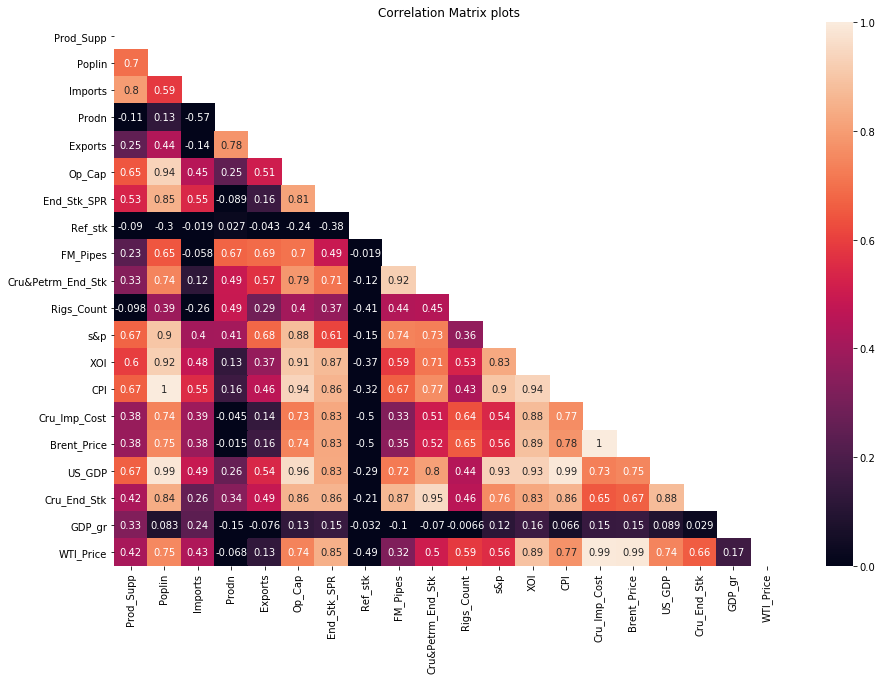

In [30]:
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(15,10))
ax = fig.gca()
sns.heatmap(corr, annot=True,ax=ax,mask=mask,linecolor='w',vmin = 0, vmax = +1)
ax.set_title('Correlation Matrix plots')
plt.show()

# 1. HISTORICAL BENCHMARK OIL PRICES
## WTI Spot Price

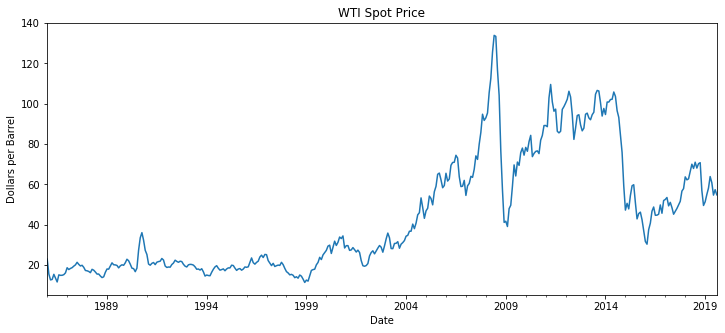

In [31]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'WTI Spot Price'
ylabel='Dollars per Barrel'

ax = df['WTI_Price'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## WTI Spot Price vs. Brent Spot Price

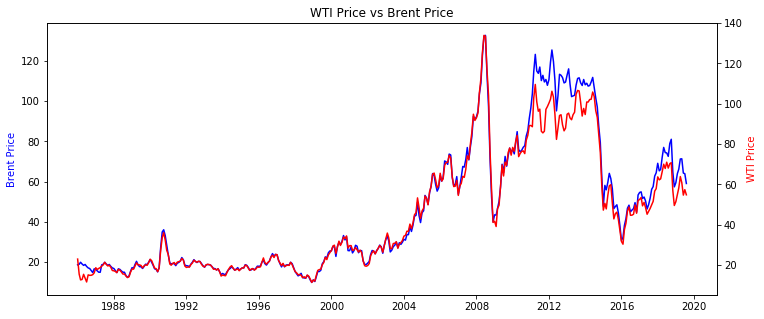

In [32]:
# create figure and axis objects with subplots()
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Brent_Price'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_title('WTI Price vs Brent Price')
ax1.set_ylabel("Brent Price",color='blue')
ax2.set_ylabel("WTI Price",color='red');

- We can  notice that Brent crude more expensive than WTI as the supply and demand forces of each crude oil are elastic due to geopolitics, weather, and regulation.
- The two most commonly quoted benchmarks are WTI and Brent.
- There are a number of other popular crude benchmarks that also trade on the CME, including Dubai Crude, Russia's Urals and Canada's Western Canadian Select.
- About two thirds of the world's internationally traded crudes are priced in reference to Brent. 
- About one-fifth of the world's oil supply, particularly from China and the Middle East, does not trade on open markets. Instead, prices are negotiated between buyers and sellers. 
- Oil prices are underpinned by supply/demand fundamentals but can also be greatly impacted by market sentiment, global currencies and availability of money flow in financial markets.


# -------------------------------------------------------------------------------------


# 2. What Causes Oil Prices Fluctuate and make it hard to forecast?
### When studying factors, we have found out that there are some categories that may affect oil prices stability
1. GEOPOLITICAL EVENTS: WAR, STRIFE AND CONFLICT
2. OPEC PRODUCTION CHANGES
3. Economic cycles and recessions
4. TECHNOLOGICAL SHIFTS AND INNOVATION
5. CAPITAL INVESTMENT
6. Global GDP growth and oil prices

## 1. GEOPOLITICAL EVENTS: WAR, STRIFE AND CONFLICT


1. Geopolitical events, such as war, sanctions or global conflicts, can affect supply or stability of supply. Although oil output may not be directly affected, oil markets can be jolted if supply is perceived to be at risk. 
2. Although conflicts can cause oil prices to rise, meaningful declines in oil prices can also lead to political upheaval. 
3. Oil production accounts for a big chunk of government revenues in places like Venezuela, Russia, the Middle-East. So when oil prices are low, the economy contracts sharply, government handouts get reduced. This can sometimes fuel anti-government sentiment, initiating cycles of civil unrest. 
4. This was evident during the Arab spring uprising, collapse of Venezuela's economy and the rise of terrorist activity in Nigeria. 
4. Deep political issues may have existed prior to the 2008 oil price drop, but the subsequent collapse in oil revenues only added more fuel to the fire.

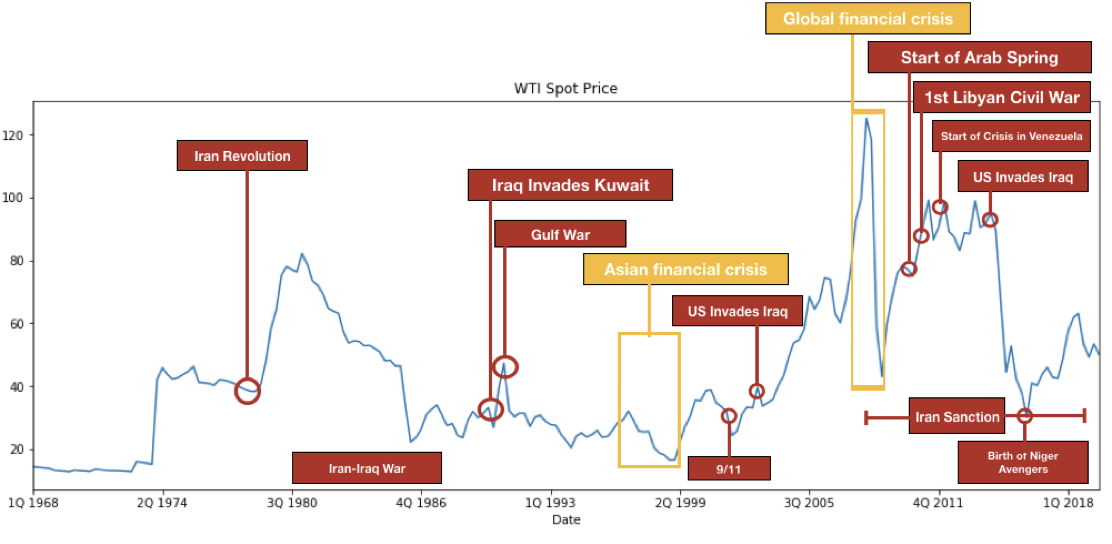


# 2. OPEC PRODUCTION CHANGES

1. The Organization of Petroleum Exporting Countries (OPEC) accounts for about 40% of the world's oil production, largely from state-owned oil fields. 

2. OPEC was founded in the early 1960s with the goal of coordinating its members' petroleum policies and stabilizing oil markets.

3.  As state producers, OPEC members are not directly accountable to shareholders, allowing them to throttle output and control the supply side of the curve.

4. There have been several coordinated OPEC production cuts over the past few decades, each intended to limit supply while demand is temporarily low, such as in the case of global recessions or excessive production. 


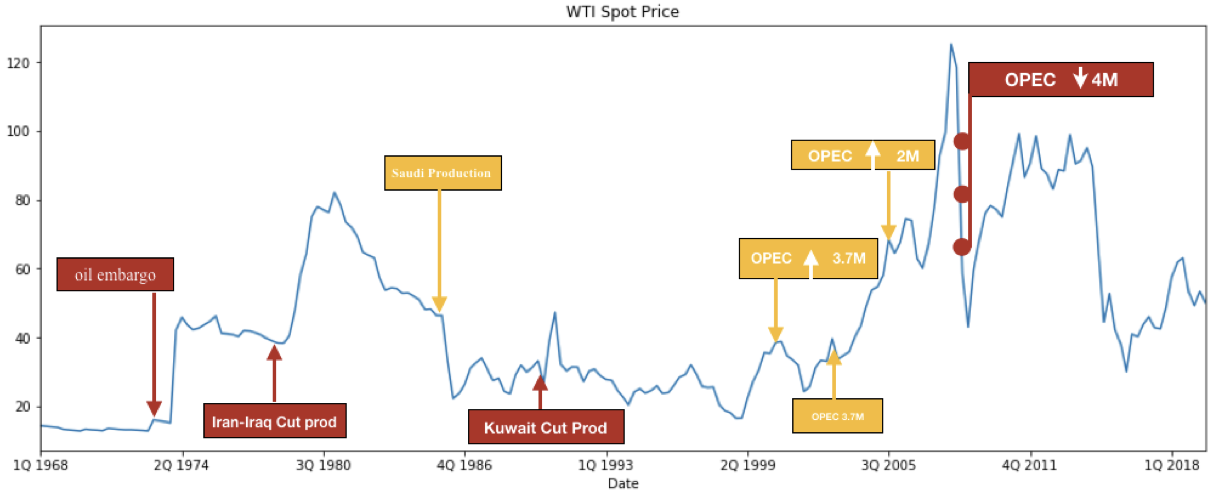

# 3. Economic cycles and recessions
### All commodities, including oil, tend to follow periodic cycles of expansion and contraction:
1. As the economy expands, demand for energy increases, causing prices to rise.
2. As prices rise, producers will try to increase output, expanding the supply.
3. Rising oil prices creep into all corners of the economy, sparking inflation.
4. Consumers then start to feel the pinch in their wallets, sometimes causing a change in spending patterns and eventually leading to economic contraction.
5. Since demand is elastic, oil consumption starts to drop-off, creating an oversupply in the market. And that eventually causes the oil price to drop.
6. Spikes in oil prices have long been a prediction of upcoming recessions

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.graph_objs import Layout
# read prices
prices_df = pd.read_csv('prices.csv')
# rename long column name with a short name
prices_df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'wti_price', 'Date': 'date'}, inplace=True)
# get the important columns only
prices_df = prices_df[['wti_price', 'date']]
prices_df = prices_df.dropna()
# read events csv file with \t sep and get the event_date and event_name without description
events_df = pd.read_csv('oil_events.csv', sep='\t')[['event_date', 'event_name']]
# rename event_date to date
events_df.rename(columns={'event_date': 'date'}, inplace=True)
# convert date columnt to time that we can compare
prices_df['date'] = pd.to_datetime(prices_df['date'],infer_datetime_format=True)
events_df['date'] = pd.to_datetime(events_df['date'],infer_datetime_format=True)
# init empty dataframe
events_to_plot = pd.DataFrame({'date': [], 'event': [], 'price': []})
# loop throw events 
for event in events_df.iterrows():
    # get the event 'YYYY-M'
    event_date = event[1].date.strftime('%Y-%m')
    # get the columns that has the same date of event
    r = prices_df[prices_df['date'].dt.strftime('%Y-%m') == event_date]
    # convert those columns price to list
    prices_list = r['wti_price'].tolist()
    # check if there is a result and there is realy price with that event date
    if(prices_list):
        # print
        print(event_date, '>>',prices_list[0], f'({event[1].event_name})')
        # add event date and event name and price at this event to empty data frame 
        # that we init it above
        events_to_plot = events_to_plot.append({'date': event_date,
                                                'event': event[1].event_name,
                                                'price': prices_list[0]}, ignore_index=True)

1986-01 >> 25.56 (Saudi Arabia Played Swing producer role, then the production decreased)
1986-01 >> 25.56 (Saudi abandon producer role)
1986-09 >> 16.43 (OPEC cuts production)
1990-01 >> 22.88 (Iraq Invades Kuwait)
1997-11 >> 20.91 (Asian Financial crisis and OPEC increased its production)
1998-01 >> 17.41 (OPEC cuts production target 1.7 mmbpd)
2000-01 >> 25.56 (Low square capacity from 2000 to 2008)
2001-09 >> 26.94 (9-11 attack)
2002-01 >> 21.13 (Venezuelan general strike of 2002-2003)
2003-01 >> 31.97 (US invades Iraq)
2007-01 >> 60.77 (Nigerian oil pipeline attacks)
2008-09 >> 109.63 (Global Financial collapse)
2009-01 >> 46.17 (OPEC cuts production targets 4.2 mmbpd)
2011-01 >> 91.59 (Arab Spring)
2012-01 >> 102.96 (US sanctions against Iran)
2018-08 >> 68.8 (Announcing the renewal of US anctions against Iranian energy)
2019-09 >> 53.91 (The torrist attack on Abqaiq-Khurais)


In [34]:
fig = go.Figure(layout=Layout(plot_bgcolor='rgb(245,245,245)'))
# plot the WTI price
fig.add_trace(go.Line(x=prices_df.date, y=prices_df.wti_price, name='WTI Price', line_color='skyblue'))
# plot each event point seperatly
for row in events_to_plot.iterrows():
    fig.add_trace(go.Scatter(x=[row[1].date], y=[row[1].price], name=row[1].event, mode='markers'))

# edit marker colors
fig.update_traces(marker=dict(size=12, line=dict(width=3, color='black')))
# edit layout height
fig.update_layout(autosize=True, height=750)
# put legend horizontaly
fig.update_layout(legend_orientation="h")

# -------------------------------------------------------------------------------------

# 4. TECHNOLOGICAL SHIFTS AND INNOVATION

- changes in technology can have a profound effect on supply.
- We can see here that oil production was directly related to the number of rigs count, Increasing rig counts caused increasing  of oil production which lead to decreased oil price. 
- However over the past decade, due to technology shift as you see Rigs have fallen but production has continued to grow. 
- Horizontal drilling technology combined with fracking allows operators to cover up to 3,000 meters of rock, versus a previous norm of a few hundred meters

## US Production

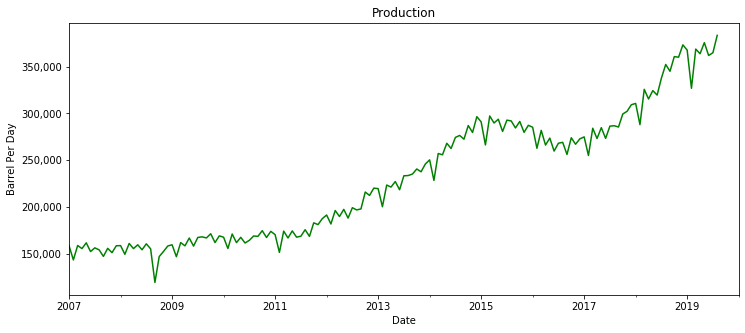

In [35]:
title = 'Production'
ylabel='Barrel Per Day'

ax = df['Prodn'].plot(figsize=(12,5),title=title, color = 'green')
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);
ax.set_xlim(['20070101 00:00:00', '20200101 00:00:00']);

## Crude Production vs. Rig Rounts vs. WTI Price

Text(0, 0.5, 'WTI Price')

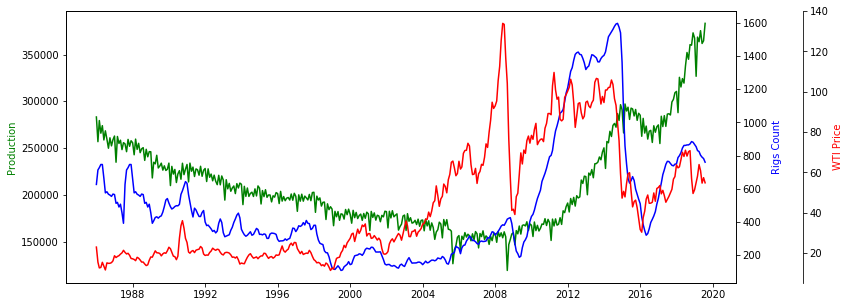

In [36]:
# create figure and axis objects with subplots()
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()

ax3.spines['right'].set_position(('axes',1.1))

ax1.plot(df.index, df['Prodn'],color='green')
ax2.plot(df.index, df['Rigs_Count'],color='blue')
ax3.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Production",color='green')
ax2.set_ylabel("Rigs Count",color='blue')
ax3.set_ylabel("WTI Price",color='red')
# ax1.set_ylim(100000,500000);
# ax2.set_ylim(100,2000);
# ax3.set_ylim(-200,150);

# t = [datetime.date(2003, 1, 1), datetime.date(2012, 1, 1),datetime.date(2015, 1, 1)]
# for x in t: 
#     ax1.axvline(x=x, color='red', alpha = 0.2,linewidth=10);
    

## Crude Production & WTI Price

In [37]:
df_diff=df.diff()

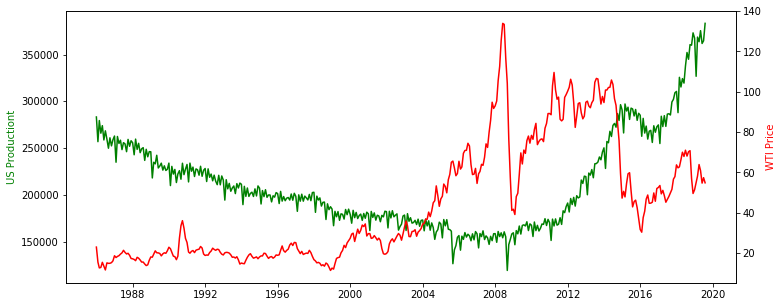

In [38]:
# fig,ax1 = plt.subplots(figsize=(12,5))
# #ax2=ax1.twinx()
# ax3=ax1.twinx()

# ax3.spines['right'].set_position(('axes',1.1))

# ax1.plot(df.index, df['Prodn'],color='green')
# #ax2.plot(df.index, df['Rigs_Count'],color='blue')
# ax3.plot(df.index, df['WTI_Price'],color='red')

# ax2.grid(b=False)

# ax1.set_ylabel("Production",color='green')
# #ax2.set_ylabel("Rigs Count",color='blue')
# ax3.set_ylabel("WTI Price",color='red')
# # ax1.set_ylim(100000,500000);
# # #ax2.set_ylim(100,2000);
# # ax3.set_ylim(-200,150);

# # t = [datetime.date(2003, 1, 1), datetime.date(2012, 1, 1),datetime.date(2015, 1, 1)]
# # for x in t: 
# #     ax1.axvline(x=x, color='k', alpha = 0.5);
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Prodn'],color='green')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("US Productiont",color='green')
ax2.set_ylabel("WTI Price",color='red');

## Crude Production & Rig Counts 

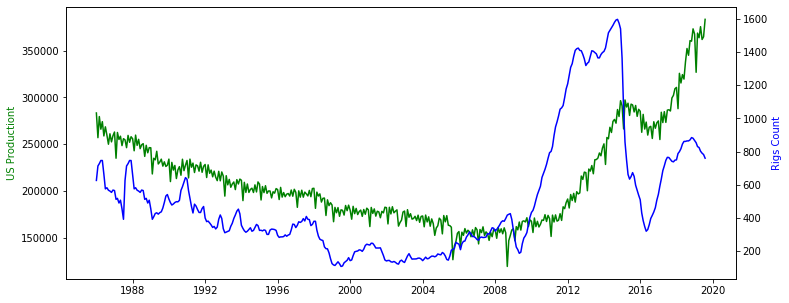

In [39]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Prodn'],color='green')
ax2.plot(df.index, df['Rigs_Count'],color='blue')

ax2.grid(b=False)

ax1.set_ylabel("US Productiont",color='green')
ax2.set_ylabel("Rigs Count",color='blue');

# -------------------------------------------------------------------------------------

# 5. CAPITAL INVESTMENT

1. Capital investment, or lack thereof, can have a profound effect on future oil supply. However, there is a considerable time lag between when the capital is deployed and when first oil is produced.

2. When oil prices suddenly collapse, production doesn't dry up instantly. Large multi-billion dollar projects take years to construct and eventually come online, regardless of the price of crude. That's why production often keeps growing as oil prices initially begin to fall. Conversely, when prices recover, it can take a long time for production to recover, even if more capital is deployed. This is especially true for oil sands mining projects and massive deepwater drilling platforms.

3. More importantly, capital investment is a function of cash flow and therefore follows the oil price (not vice versa).

4. The effect is clearly evident in US crude production, where the number of oil rigs in service lags the price of WTI by about 4 to 5 months.

## WTI Price vs. Oil Rigs Count

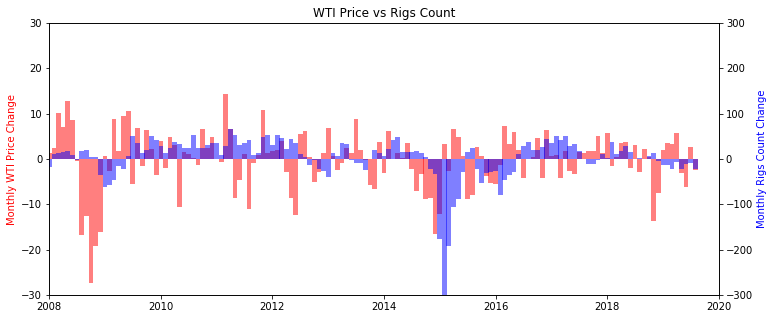

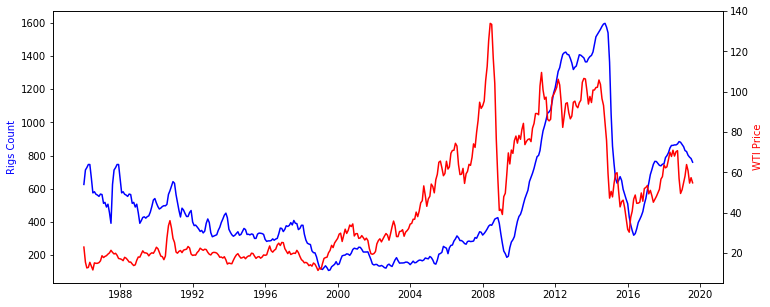

In [40]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()  # set up the 2nd axis

ax1.bar(df.index, df_diff['WTI_Price'],width=1, alpha=0.5, color='red')
ax2.bar(df.index, df_diff['Rigs_Count'],width=1, alpha=0.5, color='blue')

ax2.grid(b=False) # turn off grid #2
 
ax1.set_title('WTI Price vs Rigs Count')
ax1.set_ylabel('Monthly WTI Price Change',color="red")
ax2.set_ylabel('Monthly Rigs Count Change',color="blue")
ax1.set_ylim(-30,30);
ax2.set_ylim(-300,300);
ax1.set_xlim(['20080101 00:00:00', '20200101 00:00:00']);

fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Rigs_Count'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Rigs Count",color='blue')
ax2.set_ylabel("WTI Price",color='red');

- oil prices and rig count have a positive relationship, any decrease in oil prices negatively affects rig counts. we saw a period of global recession that included a drastic fall in crude oil prices in 2008, which was followed by a drop in the world rig count. Similarly, as oil prices recouped in 2009, the rig count also started an upward trend. In 2015, we witnessed another situation wherein a drop in oil prices was followed by a drop in rig count.

- When oil prices increase, the demand for drilling and so the rig count increases. Similarly, falling oil prices are often followed by lower rig counts.

In [41]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [42]:
# tscL = df[['WTI_Price','Prodn', 'Rigs_Count']]
# mms = MinMaxScaler(feature_range=(0,1))
# p = pd.DataFrame(mms.fit_transform(tscL),columns=tscL.columns)
# # #r = pd.DataFrame(mms.fit_transform(data = df, columns=))
# # df.columns  = tscL

# -------------------------------------------------------------------------------------

# 6. Global GDP growth and oil prices

1. Outside of the Middle-East, Russia, Canada, Venezuela and Norway, most of the world's largest economies are net energy importers, the largest being the US, Europe, China, India and Japan. A low oil price is therefore key to their economic growth.

2. Since 2005, most of the world's GDP growth has come from emerging markets, predominantly China, India and Southeast Asia. In fact, petroleum consumption in non-OECD countries exceeded OECD countries for the first time in 2014. Although recent global GDP data has been soft, it's being dragged lower by developed countries, where demand for oil is relatively stagnant.

3. Although a low oil price is generally good for most economies, it increases demand, which puts upward pressure on oil prices. However, if prices get too high, global markets can easily tip into recession, curbing demand for crude. Global economic growth, particular in non-OECD countries, is therefore a key variable in projecting where oil prices are headed.

## WTI Price & World GDP

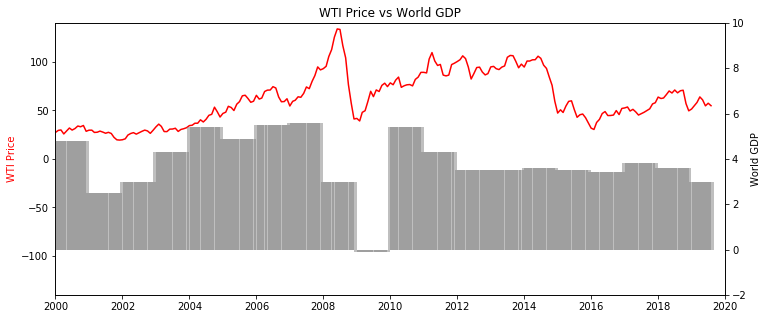

In [43]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()

ax1.plot(df['WTI_Price'],color='red') 
ax2.bar(df.index, df['GDP_gr'] ,width=2, alpha=.5, color='gray')

ax2.grid(b=False) 
 
ax1.set_title('WTI Price vs World GDP')
ax1.set_ylabel('WTI Price', color='red')
ax2.set_ylabel('World GDP', color='black')
ax1.set_ylim(-140,140);
ax2.set_ylim(-2,10);
ax1.set_xlim(['20000101 00:00:00', '20200101 00:00:00']);

# WTI Price & US GDP

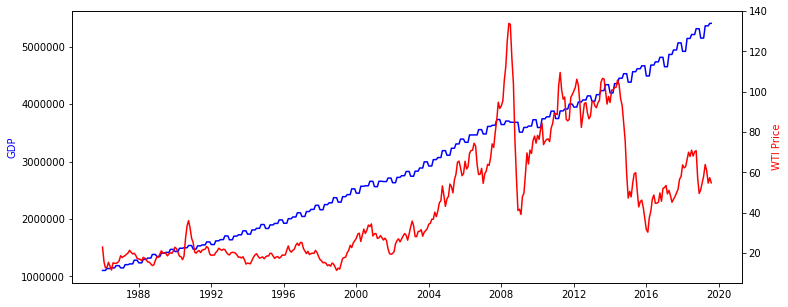

In [44]:
ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['US_GDP'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("GDP",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# --------------------------------------------------------------------------

# WTI Price Average Per Month

## Oil prices tend to peak in summer months.

In [45]:
month_mean=df.groupby(by=df.index.month)['WTI_Price'].mean()

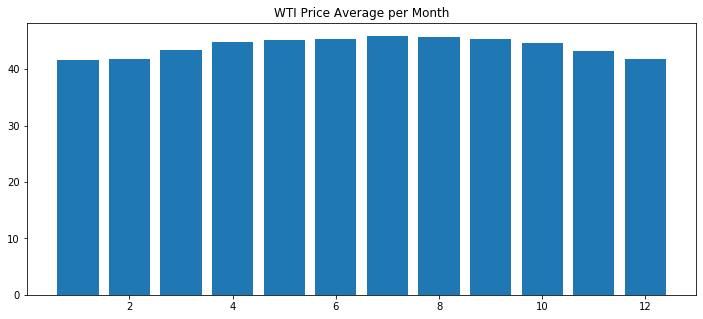

In [46]:
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(month_mean.index, month_mean)

ax.set_title('WTI Price Average per Month');

# --------------------------------------------------------------------------

# U.S Stocks of Crude Oil  & WTI Price

# 1. U.S. Ending Stocks of Crude Oil in SPR & WTI Price

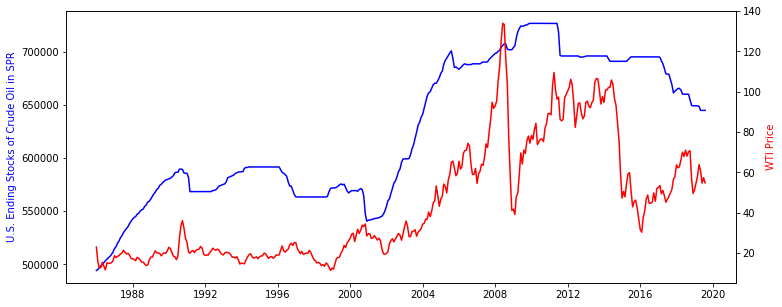

In [47]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['End_Stk_SPR'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("U.S. Ending Stocks of Crude Oil in SPR",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# 2. Refinery Stocks & WTI Price

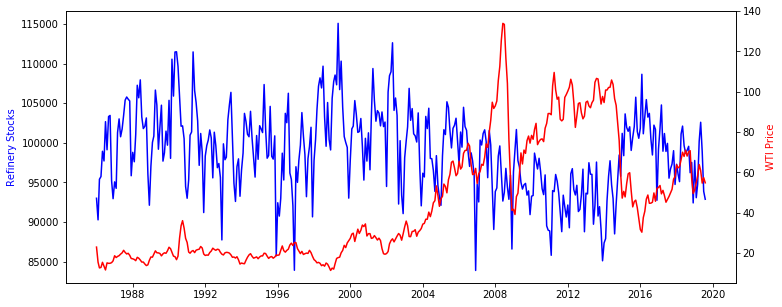

In [48]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Ref_stk'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Refinery Stocks",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# 3. U.S. Ending Stocks of Crude Oil and Petroleum Products & WTI Price

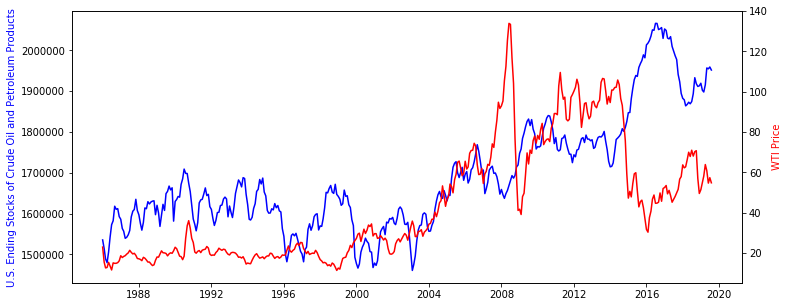

In [49]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Cru&Petrm_End_Stk'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("U.S. Ending Stocks of Crude Oil and Petroleum Products",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# 4. Crude Ending stocks & WTI Price

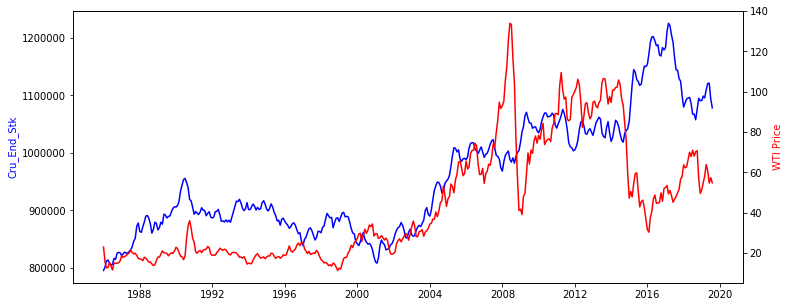

In [50]:

ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Cru_End_Stk'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Cru_End_Stk",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# --------------------------------------------------------------------------

# Financial Market

# 1. Oil and gas index ARCA & WTI Price

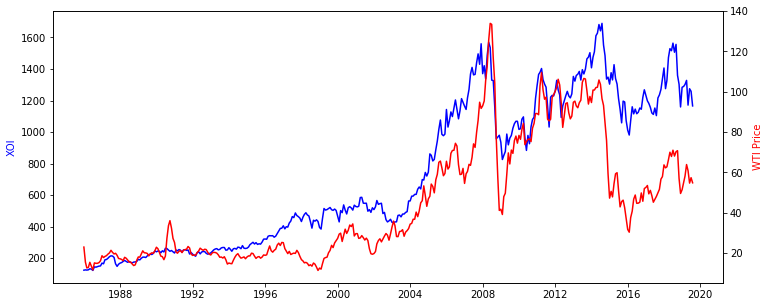

In [51]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['XOI'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("XOI",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# 2. Consumer Price Index CPI & WTI_Price

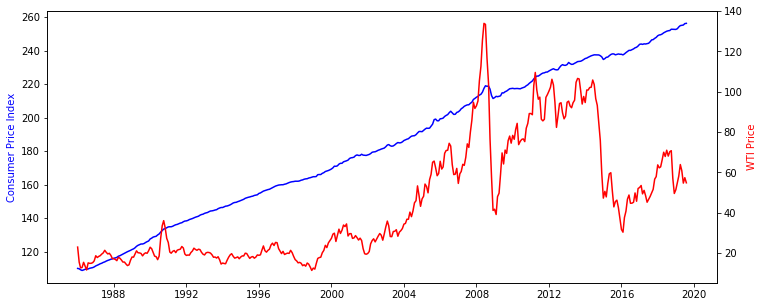

In [52]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['CPI'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Consumer Price Index",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# 3. S&P 500 index & WTI Price

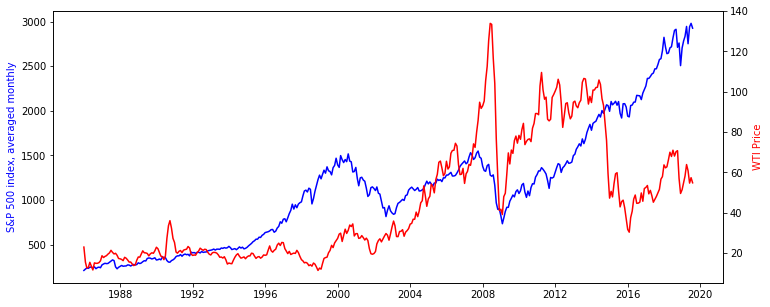

In [53]:
ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['s&p'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("S&P 500 index, averaged monthly",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# --------------------------------------------------------------------

#  U.S. product supplied of crude oil and petroleum products & WTI_Price

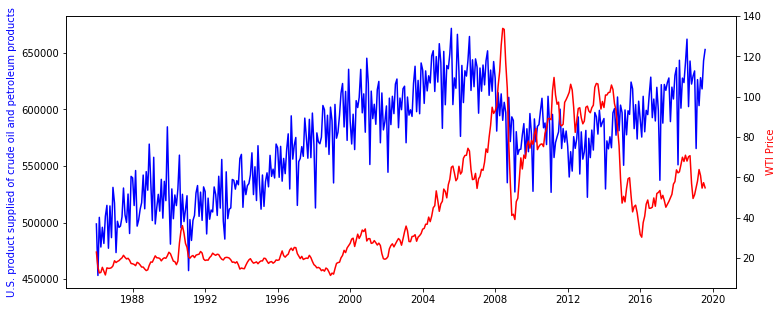

In [54]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Prod_Supp'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("U.S. product supplied of crude oil and petroleum products",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# Operable Capacity & WTI Price

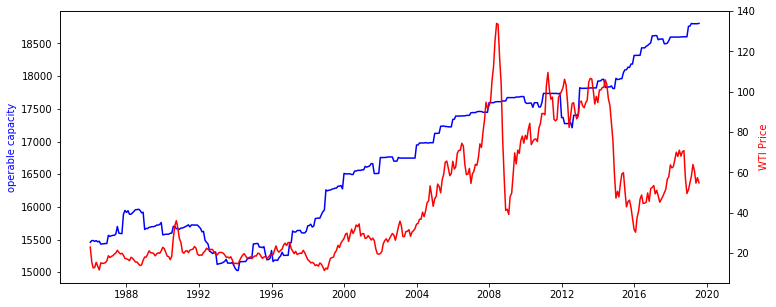

In [55]:
ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Op_Cap'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("operable capacity",color='blue')
ax2.set_ylabel("WTI Price",color='red');

#  US Population & WTI Price

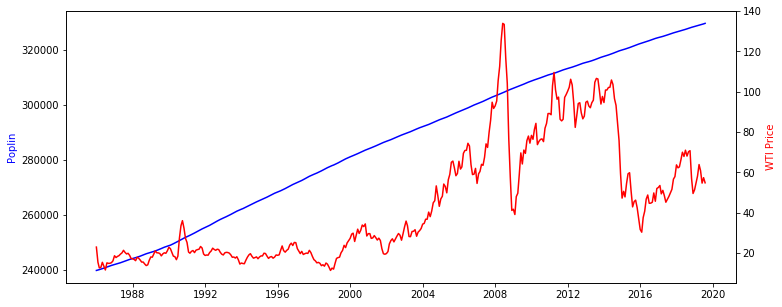

In [56]:
ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Poplin'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Poplin",color='blue')
ax2.set_ylabel("WTI Price",color='red');

#  U.S. imports of crude & WTI Price

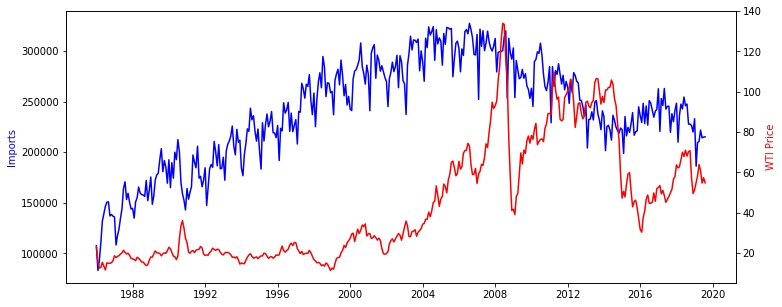

In [57]:

ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Imports'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Imports",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# U.S. Exports of crude & WTI Price

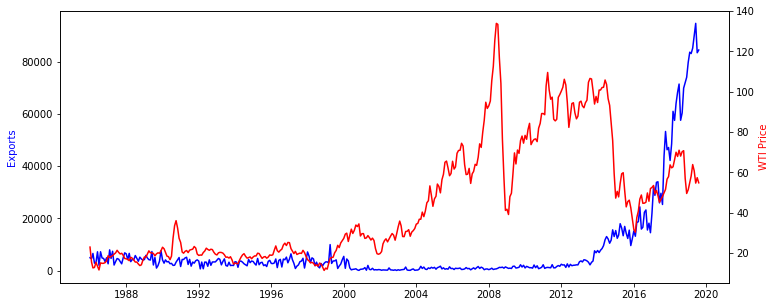

In [58]:
ig,ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()

ax1.plot(df.index, df['Exports'],color='blue')
ax2.plot(df.index, df['WTI_Price'],color='red')

ax2.grid(b=False)

ax1.set_ylabel("Exports",color='blue')
ax2.set_ylabel("WTI Price",color='red');

# Machine Learning & Deep Learning

# Time Series Forecasting

Time series forecasting is a technique for the prediction of events through a sequence of time. The techniques predict future events by analyzing the time patterns of the past, on the assumption that future patterns will hold similar to historical one.

### Time Series Components
to build an understanding of the time series behaviour

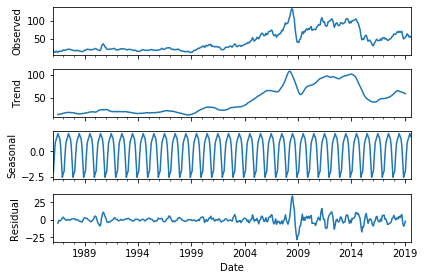

In [120]:
seasonal_decompose(df['WTI_Price'], model='add').plot();

### Stationarity
In Time Series, stationarity is a characteristic property of having constant statistical measures such as mean and variance over time.
For Time Series Analysis to be performed on a dataset, it should be stationary.

### Augmented Dickey-Fuller Test
function to determine if the time series is stationary

In [160]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Run the augmented Dickey-Fuller Test

In [161]:
adf_test(df['WTI_Price'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.796895
p-value                   0.382005
# lags used               6.000000
# observations          397.000000
critical value (1%)      -3.446930
critical value (5%)      -2.868848
critical value (10%)     -2.570663
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Run the augmented Dickey-Fuller Test on the First Difference
using differencing for non-stationary datasets to make it stationary.

In [162]:
adf_test(diff(df['WTI_Price'],k_diff=1))

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.607867e+00
p-value                 1.845321e-16
# lags used             5.000000e+00
# observations          3.970000e+02
critical value (1%)    -3.446930e+00
critical value (5%)    -2.868848e+00
critical value (10%)   -2.570663e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Models

in this section we will try different models, then evaluate them to choose the best one to use it to forecast future values.

In [163]:
#models evaluation df
evaluation = pd.DataFrame({'Model': [],
                           'MSE':[],
                           'RMSE':[],
                           'Description':[]})

### Split the data into train/test sets

In [164]:
len(df)

404

In [165]:
months=12
train, test = df[0:-months], df[-months:]

## Univariate Time Series
When there is only a single variable that can be used to determine its value for an unknown interval of time, it is called a Univariate Time Series.

## ARIMA

### Use pmdarima.auto_arima to determine ARIMA Orders
The padarima library utilize the (AIC) as metric to compare the performance of various ARIMA based models.

In [166]:
stepwise_fit = auto_arima(df['WTI_Price'],
                          seasonal=False,
                          m=12,
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(2, 1, 2); AIC=2258.724, BIC=2282.718, Fit time=1.721 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2323.778, BIC=2331.775, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2266.047, BIC=2278.044, Fit time=0.082 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2277.947, BIC=2289.943, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2266.991, BIC=2286.985, Fit time=0.173 seconds
Fit ARIMA: order=(3, 1, 2); AIC=2260.239, BIC=2288.231, Fit time=0.401 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2268.150, BIC=2288.145, Fit time=0.146 seconds
Fit ARIMA: order=(2, 1, 3); AIC=2260.395, BIC=2288.388, Fit time=0.518 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2267.552, BIC=2283.548, Fit time=0.098 seconds
Fit ARIMA: order=(3, 1, 3); AIC=2262.301, BIC=2294.293, Fit time=0.633 seconds
Total fit time: 4.105 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  403
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1123.362
Method:                       css-mle   S.D. of innovations              3.928
Date:                Wed, 18 Dec 2019   AIC                           2258.724
Time:                        01:26:51   BIC                           2282.718
Sample:                             1   HQIC                          2268.223
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0881      0.164      0.538      0.591      -0.233       0.409
ar.L1.D.y      1.5008      0.089     16.845      0.000       1.326       1.675
ar.L2.D.y     -0.6080      0.091     -6.713      0.000      -0.785      -0.430
ma.L1.D.y     -1.1652      0.107    -10.866      0.000      -1.375      -0.955
ma.L2.D.y      0.2538      0.110      2.309      0.021       0.038       0.469
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2343           -0.3483j            1.2825           -0.0438
AR.2            1.2343           +0.3483j            1.2825            0.0438
MA.1            1.1426           +0.0000j            1.1426            0.0000
MA.2            3.4479           +0.0000j            3.4479            0.0000
-----------------------------------------------------------------------------
"""

This suggests that an ARIMA(2,1,2) model is the best for forecast future values of oil price.

### Fit the model

In [167]:
ARIMA_model = ARIMA(train['WTI_Price'],order=(2,1,2))
ARIMA_results = ARIMA_model.fit()
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.WTI_Price   No. Observations:                  391
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1088.783
Method:                       css-mle   S.D. of innovations              3.917
Date:                Wed, 18 Dec 2019   AIC                           2189.566
Time:                        01:26:52   BIC                           2213.378
Sample:                    02-01-1986   HQIC                          2199.004
                         - 08-01-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0997      0.322      0.310      0.757      -0.531       0.730
ar.L1.D.WTI_Price    -0.0300      0.313     -0.096      0.924      -0.643       0.583
ar.L2.D.WTI_Price     0.0768      0.175      0.438      0.662      -0.267       0.420
ma.L1.D.WTI_Price     0.3911      0.311      1.259      0.209      -0.218       1.000
ma.L2.D.WTI_Price     0.1595      0.129      1.241      0.215      -0.092       0.411
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.4192           +0.0000j            3.4192            0.5000
AR.2            3.8100           +0.0000j            3.8100            0.0000
MA.1           -1.2260           -2.1833j            2.5040           -0.3314
MA.2           -1.2260           +2.1833j            2.5040            0.3314
-----------------------------------------------------------------------------
"""

In [168]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
ARIMA_predictions = ARIMA_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,1,2) Predictions')

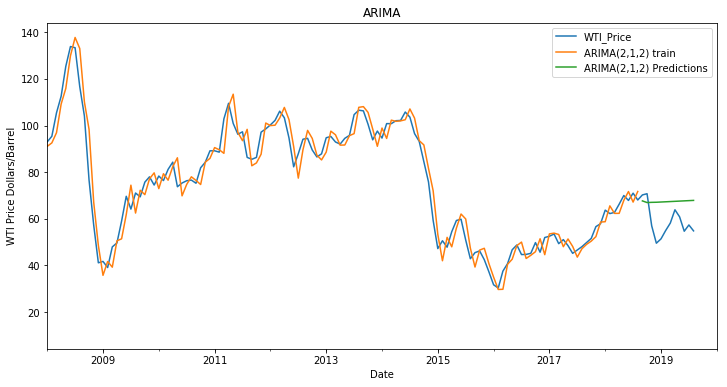

In [169]:
# Plot predictions against known values
title = 'ARIMA'
ylabel='WTI Price Dollars/Barrel'

ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
ARIMA_results.predict(1,391, typ='levels').rename('ARIMA(2,1,2) train').plot(legend=True)
ARIMA_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);
ax.set_xlim(['20080101 00:00:00', '20200101 00:00:00']);

### Evaluate the Model

In [170]:
mse_error = mean_squared_error(test['WTI_Price'], ARIMA_predictions)
print(f'ARIMA(2,1,2) MSE Error: {mse_error}')

ARIMA(2,1,2) MSE Error: 118.93355824613893


In [171]:
rmse_error = rmse(test['WTI_Price'], ARIMA_predictions)
print(f'ARIMA(2,1,2) RMSE Error: {rmse_error}')

ARIMA(2,1,2) RMSE Error: 10.905666336640735


In [172]:
evaluation = evaluation.append({'Model' : 'ARIMA' ,
                                'MSE' :mse_error , 
                                'RMSE':rmse_error,
                                'Description':'RIMA(2,1,2)'} ,ignore_index=True)

## SARIMA
ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an additional set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. and $m$ represents the number of data points (rows) in each seasonal cycle.

### Run an ETS Decomposition

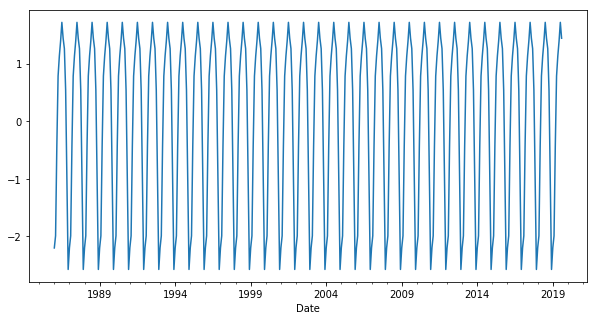

In [173]:
seasonal_decompose(df['WTI_Price'], model='add').seasonal.plot(figsize=(10,5));

Crude pricing tends to follow a seasonality pattern, rising through the spring and declining through the fall.

### Run pmdarima.auto_arima to obtain recommended orders

In [174]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['WTI_Price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  404
Model:             SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood               -1118.253
Date:                            Wed, 18 Dec 2019   AIC                           2252.506
Time:                                    01:28:27   BIC                           2284.498
Sample:                                         0   HQIC                          2265.172
                                            - 404                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.015      0.564      0.573      -0.021       0.038
ar.L1          1.5426      0.061     25.097      0.000       1.422       1.663
ar.L2         -0.6355      0.061    -10.459      0.000      -0.755      -0.516
ma.L1         -1.1965      0.088    -13.642      0.000      -1.368      -1.025
ma.L2          0.2671      0.088      3.051      0.002       0.096       0.439
ar.S.L12       0.1007      0.040      2.504      0.012       0.022       0.180
ar.S.L24      -0.1392      0.044     -3.171      0.002      -0.225      -0.053
sigma2        15.0204      0.707     21.240      0.000      13.634      16.406
===================================================================================
Ljung-Box (Q):                       30.57   Jarque-Bera (JB):               199.38
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              11.17   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (2, 1, 2) combined with a seasonal order of (2, 0, 0, 12).

### Fit the Model

In [175]:
SARIMA_model = SARIMAX(train['WTI_Price'],order=(2,1,2),seasonal_order=(0,0,2,12))
SARIMA_results = SARIMA_model.fit()
SARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          WTI_Price   No. Observations:                  392
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1077.886
Date:                            Wed, 18 Dec 2019   AIC                           2169.773
Time:                                    01:28:29   BIC                           2197.554
Sample:                                01-01-1986   HQIC                          2180.784
                                     - 08-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5672      0.055     28.514      0.000       1.460       1.675
ar.L2         -0.6627      0.054    -12.336      0.000      -0.768      -0.557
ma.L1         -1.2075      0.081    -14.974      0.000      -1.366      -1.049
ma.L2          0.2867      0.080      3.600      0.000       0.131       0.443
ma.S.L12       0.0936      0.040      2.349      0.019       0.016       0.172
ma.S.L24      -0.1637      0.043     -3.789      0.000      -0.248      -0.079
sigma2        14.4768      0.690     20.974      0.000      13.124      15.830
===================================================================================
Ljung-Box (Q):                       36.86   Jarque-Bera (JB):               174.98
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              11.39   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
SARIMA_predictions = SARIMA_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,2)(2,0,0,12) Predictions')

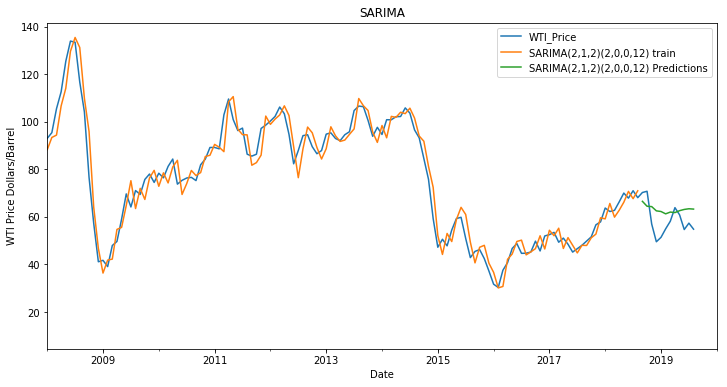

In [178]:
# Plot predictions against known values
title = 'SARIMA'
ylabel='WTI Price Dollars/Barrel'

ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
SARIMA_results.predict(1,391, typ='levels').rename('SARIMA(2,1,2)(2,0,0,12) train').plot(legend=True)
SARIMA_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);
ax.set_xlim(['20080101 00:00:00', '20200101 00:00:00']);

### Evaluate the Model

In [179]:
mse_error = mean_squared_error(test['WTI_Price'], SARIMA_predictions)
print(f'SARIMA(2,1,2)(2,0,0,12) MSE Error: {mse_error}')

SARIMA(2,1,2)(2,0,0,12) MSE Error: 52.96071498416845


In [180]:
rmse_error = rmse(test['WTI_Price'], SARIMA_predictions)
print(f'SARIMA(2,1,2)(2,0,0,12) RMSE Error: {rmse_error}')

SARIMA(2,1,2)(2,0,0,12) RMSE Error: 7.277411283153402


In [181]:
evaluation = evaluation.append({'Model' : 'SARIMA' ,
                                'MSE' :mse_error , 
                                'RMSE':rmse_error,
                                'Description':'SARIMA(2,1,2)(2,0,0,12)'} ,ignore_index=True)

## RNN

 ### Scale Data

In [182]:
scaler = MinMaxScaler()
train_uni=train[['WTI_Price']]
test_uni=test[['WTI_Price']]
scaler.fit(train_uni)
scaled_train = scaler.transform(train_uni)
scaled_test = scaler.transform(test_uni)

### Time Series Generator

In [183]:
# Let's get 12 months back and then predict the next month out
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### Fit the Model

In [184]:
# define model
RNN_model = Sequential()
RNN_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
RNN_model.add(Dense(1))
RNN_model.compile(optimizer='adam', loss='mse')
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [187]:
# fit model
RNN_model.fit_generator(generator,epochs=10)

Epoch 1/10
380/380 [==============================] - 10s 27ms/step - loss: 0.0021
Epoch 2/10
380/380 [==============================] - 10s 27ms/step - loss: 0.0019
Epoch 3/10
380/380 [==============================] - 11s 29ms/step - loss: 0.0019
Epoch 4/10
380/380 [==============================] - 10s 28ms/step - loss: 0.0017
Epoch 5/10
380/380 [==============================] - 10s 27ms/step - loss: 0.0015
Epoch 6/10
380/380 [==============================] - 11s 28ms/step - loss: 0.0016
Epoch 7/10
380/380 [==============================] - 10s 27ms/step - loss: 0.0014
Epoch 8/10
380/380 [==============================] - 11s 28ms/step - loss: 0.0015
Epoch 9/10
380/380 [==============================] - 10s 27ms/step - loss: 0.0015
Epoch 10/10
380/380 [==============================] - 10s 28ms/step - loss: 0.0014


In [188]:
# to predict 12 months
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = RNN_model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [189]:
# Inverse Transformations to get original values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=[x[0] for x in true_predictions]
RNN_predictions=pd.Series(data=true_predictions, index=test.index).rename('RNN Predictions')

In [190]:
# Plot predictions against known values
# title = 'WTI Spot Price'
# ylabel='Dollars per Barrel'

# ax = test['WTI Price'].plot(legend=True,figsize=(12,6),title=title)
# RNN_predictions.plot(legend=True)
# ax.autoscale(axis='x',tight=True)
# ax.set(ylabel=ylabel);

### Evaluate the Model

In [191]:
mse_error = mean_squared_error(test['WTI_Price'], RNN_predictions)
print(f'RNN MSE Error: {mse_error}')

RNN MSE Error: 513.284733079364


In [192]:
rmse_error = rmse(test['WTI_Price'], RNN_predictions)
print(f'RNN RMSE Error: {rmse_error}')

RNN RMSE Error: 22.65578807014587


In [193]:
evaluation = evaluation.append({'Model' : 'RNN' ,
                                'MSE' :mse_error , 
                                'RMSE':rmse_error,
                                'Description':'LSTM'} ,ignore_index=True)

## Multivariate Time Series
When there is more than one independent variable that determines the values of the dependent variable over unknown intervals of time, it is called a Multivariate Time Series.

## SARIMAX
model that encompass non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

### Run pmdarima.auto_arima to obtain recommended orders

In [194]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['WTI_Price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  404
Model:             SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood               -1118.253
Date:                            Wed, 18 Dec 2019   AIC                           2252.506
Time:                                    01:35:00   BIC                           2284.498
Sample:                                         0   HQIC                          2265.172
                                            - 404                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.015      0.564      0.573      -0.021       0.038
ar.L1          1.5426      0.061     25.097      0.000       1.422       1.663
ar.L2         -0.6355      0.061    -10.459      0.000      -0.755      -0.516
ma.L1         -1.1965      0.088    -13.642      0.000      -1.368      -1.025
ma.L2          0.2671      0.088      3.051      0.002       0.096       0.439
ar.S.L12       0.1007      0.040      2.504      0.012       0.022       0.180
ar.S.L24      -0.1392      0.044     -3.171      0.002      -0.225      -0.053
sigma2        15.0204      0.707     21.240      0.000      13.634      16.406
===================================================================================
Ljung-Box (Q):                       30.57   Jarque-Bera (JB):               199.38
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              11.17   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (2, 1, 2) and a seasonal order of (2, 0, 0, 12)

In [195]:
#eXogenous features
x=df[['Poplin','Op_Cap','US_GDP','XOI', 'CPI']]
x_train=train[['Poplin','Op_Cap','US_GDP','XOI', 'CPI']]
x_test=test[['Poplin','Op_Cap','US_GDP','XOI', 'CPI']]

## Fit the model

In [196]:
SARIMAX_model = SARIMAX(train['WTI_Price'],exog=x_train,order=(2, 1, 2),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)
SARIMAX_results = SARIMAX_model.fit()
SARIMAX_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          WTI_Price   No. Observations:                  392
Model:             SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood                -999.604
Date:                            Wed, 18 Dec 2019   AIC                           2023.207
Time:                                    01:35:13   BIC                           2070.832
Sample:                                01-01-1986   HQIC                          2042.084
                                     - 08-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Poplin        -0.0077      0.001     -8.271      0.000      -0.009      -0.006
Op_Cap         0.0007      0.004      0.185      0.854      -0.006       0.008
US_GDP        4.5e-06   3.84e-06      1.172      0.241   -3.02e-06     1.2e-05
XOI            0.0238      0.002      9.652      0.000       0.019       0.029
CPI            4.8076      0.256     18.748      0.000       4.305       5.310
ar.L1         -0.9896      0.174     -5.701      0.000      -1.330      -0.649
ar.L2         -0.6682      0.158     -4.229      0.000      -0.978      -0.359
ma.L1          0.9874      0.155      6.355      0.000       0.683       1.292
ma.L2          0.7585      0.140      5.430      0.000       0.485       1.032
ar.S.L12       0.0795      0.047      1.674      0.094      -0.014       0.173
ar.S.L24      -0.0992      0.046     -2.165      0.030      -0.189      -0.009
sigma2         9.9886      0.541     18.476      0.000       8.929      11.048
===================================================================================
Ljung-Box (Q):                       57.73   Jarque-Bera (JB):               118.98
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               6.77   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
SARIMAX_predictions = SARIMAX_results.predict(start=start, end=end, exog=x_test).rename('SARIMAX(2, 1, 2)(2, 0, 0, 12) Predictions')

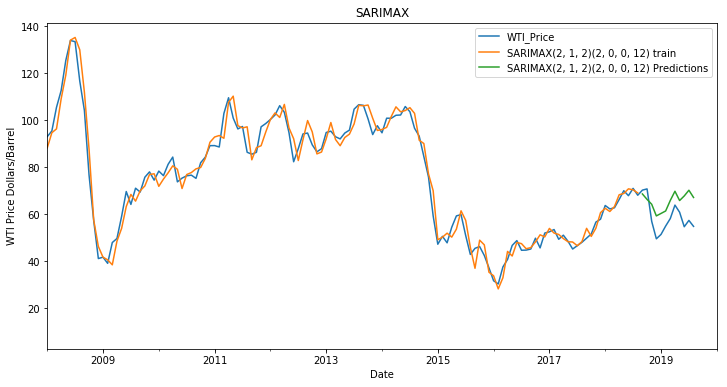

In [198]:
# Plot predictions against known values
title = 'SARIMAX'
ylabel='WTI Price Dollars/Barrel'

ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
SARIMAX_results.fittedvalues[1:].rename('SARIMAX(2, 1, 2)(2, 0, 0, 12) train').plot(legend=True)
SARIMAX_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);
ax.set_xlim(['20080101 00:00:00', '20200101 00:00:00']);

### Evaluate the Model

In [199]:
mse_error = mean_squared_error(test['WTI_Price'], SARIMAX_predictions)
print(f'SARIMAX(2, 1, 2)(2, 0, 0, 12) MSE Error: {mse_error}')

SARIMAX(2, 1, 2)(2, 0, 0, 12) MSE Error: 74.76448776840255


In [200]:
rmse_error = rmse(test['WTI_Price'], SARIMAX_predictions)
print(f'SARIMAX(2, 1, 2)(2, 0, 0, 12) RMSE Error: {rmse_error}')

SARIMAX(2, 1, 2)(2, 0, 0, 12) RMSE Error: 8.64664604158182


In [201]:
evaluation = evaluation.append({'Model' : 'SARIMAX' ,
                                'MSE' :mse_error , 
                                'RMSE':rmse_error,
                                'Description':'SARIMAX(2, 1, 2)(2, 0, 0, 12)'} ,ignore_index=True)

## VAR
The general steps involved in building a VAR model are:
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

In [202]:
adf_test(df['WTI_Price'], title='WTI Price')
print()
adf_test(df['Poplin'],title=' POPTHM')
print()
adf_test(df['Op_Cap'],title='Operable Capacity ')
print()
adf_test(df['US_GDP'], title= 'GDP')
print()
adf_test(df['XOI'], title='ARCA OIL and GAS INDEX')
print()
adf_test(df['CPI'], title='CPI')

Augmented Dickey-Fuller Test: WTI Price
ADF test statistic       -1.796895
p-value                   0.382005
# lags used               6.000000
# observations          397.000000
critical value (1%)      -3.446930
critical value (5%)      -2.868848
critical value (10%)     -2.570663
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test:  POPTHM
ADF test statistic       -3.065868
p-value                   0.029184
# lags used              15.000000
# observations          388.000000
critical value (1%)      -3.447317
critical value (5%)      -2.869018
critical value (10%)     -2.570754
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: Operable Capacity 
ADF test statistic        0.425657
p-value                   0.982429
# lags used               0.000000
# observations          403.000000
critical v

we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests.

In [203]:
df_transformed = df.diff()

In [204]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['WTI_Price'], title='WTI Price')
print()
adf_test(df_transformed['Poplin'],title=' POPTHM')
print()
adf_test(df_transformed['Op_Cap'],title='Operable Capacity ')
print()
adf_test(df_transformed['US_GDP'], title= 'GDP')
print()
adf_test(df_transformed['XOI'], title='ARCA OIL and GAS INDEX')
print()
adf_test(df_transformed['CPI'], title='CPI')

Augmented Dickey-Fuller Test: WTI Price
ADF test statistic     -9.607867e+00
p-value                 1.845321e-16
# lags used             5.000000e+00
# observations          3.970000e+02
critical value (1%)    -3.446930e+00
critical value (5%)    -2.868848e+00
critical value (10%)   -2.570663e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test:  POPTHM
ADF test statistic       -1.634799
p-value                   0.464980
# lags used              14.000000
# observations          388.000000
critical value (1%)      -3.447317
critical value (5%)      -2.869018
critical value (10%)     -2.570754
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: Operable Capacity 
ADF test statistic      -20.982853
p-value                   0.000000
# lags used               0.000000
# observations          402.000

Since POPTHM is not yet stationary, we'll apply second order differencing to all series so they retain the same number of observations

In [205]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['WTI_Price'], title='WTI Price')
print()
adf_test(df_transformed['Poplin'],title=' POPTHM')
print()
adf_test(df_transformed['Op_Cap'],title='Operable Capacity ')
print()
adf_test(df_transformed['US_GDP'], title= 'GDP')
print()
adf_test(df_transformed['XOI'], title='ARCA OIL and GAS INDEX')
print()
adf_test(df_transformed['CPI'], title='CPI')

Augmented Dickey-Fuller Test: WTI Price
ADF test statistic     -8.641322e+00
p-value                 5.416206e-14
# lags used             1.500000e+01
# observations          3.860000e+02
critical value (1%)    -3.447405e+00
critical value (5%)    -2.869057e+00
critical value (10%)   -2.570774e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test:  POPTHM
ADF test statistic       -4.274727
p-value                   0.000491
# lags used              13.000000
# observations          388.000000
critical value (1%)      -3.447317
critical value (5%)      -2.869018
critical value (10%)     -2.570754
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: Operable Capacity 
ADF test statistic     -1.073251e+01
p-value                 2.954992e-19
# lags used             1.000000e+01
# observations          3.910000e+

In [207]:
# Train/test split
# df_transformed=df_transformed[['WTI Price',' Popln', 'Op_Cap', 'GDP', 'XOI', 'CPI']]
df_transformed=df_transformed[['WTI_Price','Poplin', 'Op_Cap', 'US_GDP', 'CPI']]
nobs=12
VAR_train, VAR_test = df_transformed[0:-nobs], df_transformed[-nobs:]

### VAR Model Order Selection

In [208]:
VAR_model = VAR(VAR_train)
for i in range(10,16):
    VAR_results = VAR_model.fit(i)
    print('Order =', i)
    print('AIC: ', VAR_results.aic)
    print('BIC: ', VAR_results.bic)
    print()

Order = 10
AIC:  34.44719117690519
BIC:  37.091253464914956

Order = 11
AIC:  32.6826475443589
BIC:  35.59164526843035

Order = 12
AIC:  32.69950739776703
BIC:  35.87448816407384

Order = 13
AIC:  32.756259792577346
BIC:  36.198278126417776

Order = 14
AIC:  32.64334057948466
BIC:  36.35345798880225

Order = 15
AIC:  32.68931885739266
BIC:  36.66860389704267



The VAR(14) model seems to return the lowest combined scores.

### Fit the Model

In [209]:
VAR_results = VAR_model.fit(14)
VAR_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Dec, 2019
Time:                     01:36:22
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    36.3535
Nobs:                     376.000    HQIC:                   34.1161
Log likelihood:          -8449.55    FPE:                1.53739e+14
AIC:                      32.6433    Det(Omega_mle):     6.47419e+13
--------------------------------------------------------------------
Results for equation WTI_Price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.006143         0.207582           -0.030           0.976
L1.WTI_Price         -0.431402         0.067282           -6.412           0.000
L1.Poplin            -0.008426         0.032750         

In [210]:
# Predict the next 12 values
lag_order = VAR_results.k_ar
z = VAR_results.forecast(y=VAR_train.values[-lag_order:], steps=12)

In [211]:
#create df to store differencing values for each feature and the forecasted values
idx = pd.date_range('9/1/2018', periods=12, freq='MS')
# df_forecast = pd.DataFrame(z, index=idx, columns=['WTI Price2d', 'Popln2d', 'Op_Cap2d', 'GDP2d', 'XOI2d', 'CPI2d'])
df_forecast = pd.DataFrame(z, index=idx, columns=['WTI Price2d', 'Popln2d', 'Op_Cap2d', 'GDP2d', 'CPI2d'])

### Invert the Transformation
The forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values

In [212]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['WTI Price1d'] = (df['WTI_Price'].iloc[-nobs-1]-df['WTI_Price'].iloc[-nobs-2]) + df_forecast['WTI Price2d'].cumsum()
df_forecast['Popln1d'] = (df['Poplin'].iloc[-nobs-1]-df['Poplin'].iloc[-nobs-2]) + df_forecast['Popln2d'].cumsum()
df_forecast['Op_Cap1d'] = (df['Op_Cap'].iloc[-nobs-1]-df['Op_Cap'].iloc[-nobs-2]) + df_forecast['Op_Cap2d'].cumsum()
df_forecast['GDP1d'] = (df['US_GDP'].iloc[-nobs-1]-df['US_GDP'].iloc[-nobs-2]) + df_forecast['GDP2d'].cumsum()
# df_forecast['XOI1d'] = (df['XOI'].iloc[-nobs-1]-df['XOI'].iloc[-nobs-2]) + df_forecast['XOI2d'].cumsum()
df_forecast['CPI1d'] = (df['CPI'].iloc[-nobs-1]-df['CPI'].iloc[-nobs-2]) + df_forecast['CPI2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['WTI Price Forecast'] = df['WTI_Price'].iloc[-nobs-1] + df_forecast['WTI Price1d'].cumsum()
df_forecast['Popln Forecast'] = df['Poplin'].iloc[-nobs-1] + df_forecast['Popln1d'].cumsum()
df_forecast['Op_Cap Forecast'] = df['Op_Cap'].iloc[-nobs-1] + df_forecast['Op_Cap1d'].cumsum()
df_forecast['GDP Forecast'] = df['US_GDP'].iloc[-nobs-1] + df_forecast['GDP1d'].cumsum()
# df_forecast['XOI Forecast'] = df['XOI'].iloc[-nobs-1] + df_forecast['XOI1d'].cumsum()
df_forecast['CPI Forecast'] = df['CPI'].iloc[-nobs-1] + df_forecast['CPI1d'].cumsum()

In [213]:
VAR_predictions=df_forecast['WTI Price Forecast'].rename('VAR Predictions')

In [214]:
fittedvalues= VAR_results.fittedvalues
fittedvalues['WTI Price1d'] = (df['WTI_Price'].iloc[13]-df['WTI_Price'].iloc[12]) + fittedvalues['WTI_Price'].cumsum()
fittedvalues['WTI Price Forecast'] = df['WTI_Price'].iloc[13] + fittedvalues['WTI Price1d'].cumsum()

In [215]:
# # Plot predictions against known values
# title = 'VAR'
# ylabel='Dollars per Barrel'

# ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
# fittedvalues['WTI Price Forecast'].plot(legend=True)
# VAR_predictions.plot(legend=True)
# ax.autoscale(axis='x',tight=True)
# ax.set(ylabel=ylabel);

### Evaluate the Model

In [216]:
mse_error = mean_squared_error(test['WTI_Price'], VAR_predictions)
print(f'VAR MSE Error: {mse_error}')

VAR MSE Error: 841.1844634226909


In [217]:
rmse_error = rmse(test['WTI_Price'], VAR_predictions)
print(f'VAR RMSE Error: {rmse_error}')

VAR RMSE Error: 29.00318022946261


In [218]:
evaluation = evaluation.append({'Model' : 'VAR' ,
                                'MSE' :mse_error , 
                                'RMSE':rmse_error,
                                'Description':''} ,ignore_index=True)

# CNN

In [228]:
import plotly_express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD
import keras
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
import math
from statsmodels.tools.eval_measures import rmse

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [269]:
feature_names = ['Prod_Supp', 'Poplin', 'Imports', 'Exports', 'Op_Cap',
                  'End_Stk_SPR', 'FM_Pipes', 'Cru_End_Stk',
                  'Cru&Petrm_End_Stk', 'Rigs_Count', 'US_GDP', 's&p', 'XOI', 'CPI']

In [270]:
X = df[feature_names]
y = df[['WTI_Price']]

In [271]:
# normalization of data
for c in X.columns.tolist():
    def norm(v):
        global c
        return (v - X[c].min()) / (X[c].max() - X[c].min())
    X[c] = X[c].apply(norm)

In [272]:
X.head(3)

,Prod_Supp,Poplin,Imports,Exports,Op_Cap,End_Stk_SPR,FM_Pipes,Cru_End_Stk,Cru&Petrm_End_Stk,Rigs_Count,US_GDP,s&p,XOI,CPI
Date,,,,,,,,,,,,,,
1986-01-01,0.208383,0.000000,0.100366,0.051370,0.114021,0.000000,0.139539,0.000000,0.123525,0.348118,0.0,0.000000,0.001040,0.008130
1986-02-01,0.000000,0.001612,0.000000,0.047200,0.120899,0.004259,0.162081,0.014458,0.088070,0.406586,0.0,0.005468,0.002304,0.006775
1986-03-01,0.235105,0.003312,0.039042,0.068884,0.120899,0.010765,0.175735,0.038663,0.046377,0.415995,0.0,0.009796,0.001430,0.002710


In [294]:
test_percentage = 25
test_size = int(test_percentage / 100 * len(X))
train_size = len(X) - test_size

print(test_size)
print(train_size)
print(test_size + train_size)

101
303
404


In [295]:
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [296]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 14)
(303, 1)
(101, 14)
(101, 1)


In [297]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(len(feature_names) + 15, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(len(feature_names) + 60, activation='elu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=SGD(lr=0.0008), loss = 'mean_squared_error', metrics =[metrics.mae])
    #model.compile(optimizer='adam', loss = 'mean_squared_error', metrics =[metrics.mae])
    return model

In [298]:
model = create_model()

In [299]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 14)
(303, 1)
(101, 14)
(101, 1)


In [300]:
seed = 2
np.random.seed(seed)
tf.random.set_seed(seed)

In [301]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=5)

Train on 303 samples, validate on 101 samples
Epoch 1/40
303/303 [==============================] - 0s 917us/step - loss: 546.9704 - mean_absolute_error: 15.3207 - val_loss: 697.8161 - val_mean_absolute_error: 25.0807
Epoch 2/40
303/303 [==============================] - 0s 824us/step - loss: 169.6711 - mean_absolute_error: 9.0366 - val_loss: 633.0971 - val_mean_absolute_error: 23.6657
Epoch 3/40
303/303 [==============================] - 0s 447us/step - loss: 139.4820 - mean_absolute_error: 7.3555 - val_loss: 847.4194 - val_mean_absolute_error: 24.2925
Epoch 4/40
303/303 [==============================] - 0s 414us/step - loss: 141.5886 - mean_absolute_error: 7.2285 - val_loss: 713.2760 - val_mean_absolute_error: 22.6774
Epoch 5/40
303/303 [==============================] - 0s 481us/step - loss: 97.6421 - mean_absolute_error: 6.4179 - val_loss: 823.5499 - val_mean_absolute_error: 23.8533
Epoch 6/40
303/303 [==============================] - 0s 724us/step - loss: 121.6789 - mean_absolut

In [302]:
min_error = min(history.history['val_mean_absolute_error'])
best_epoch_index = history.history['val_mean_absolute_error'].index(min_error)

print(f'Best epoch index: {best_epoch_index + 1}, with error = {min_error}')

Best epoch index: 39, with error = 7.730329990386963


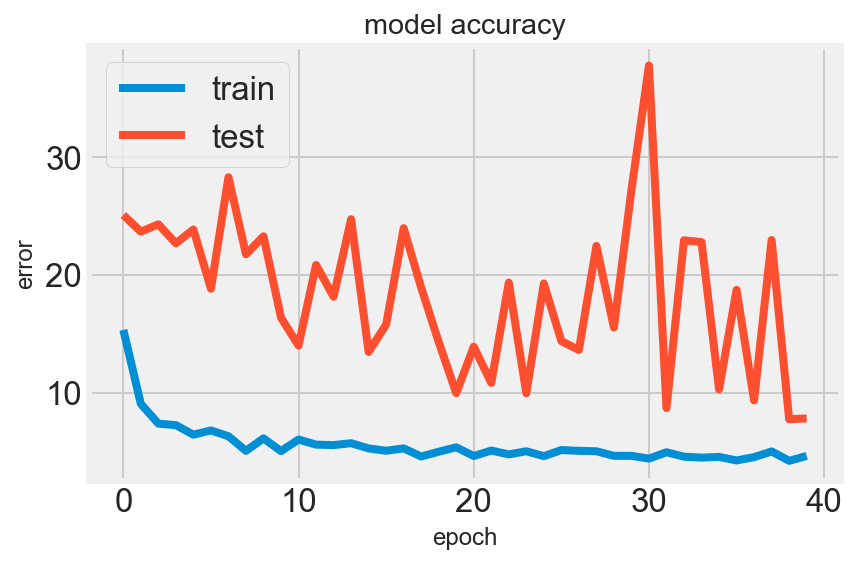

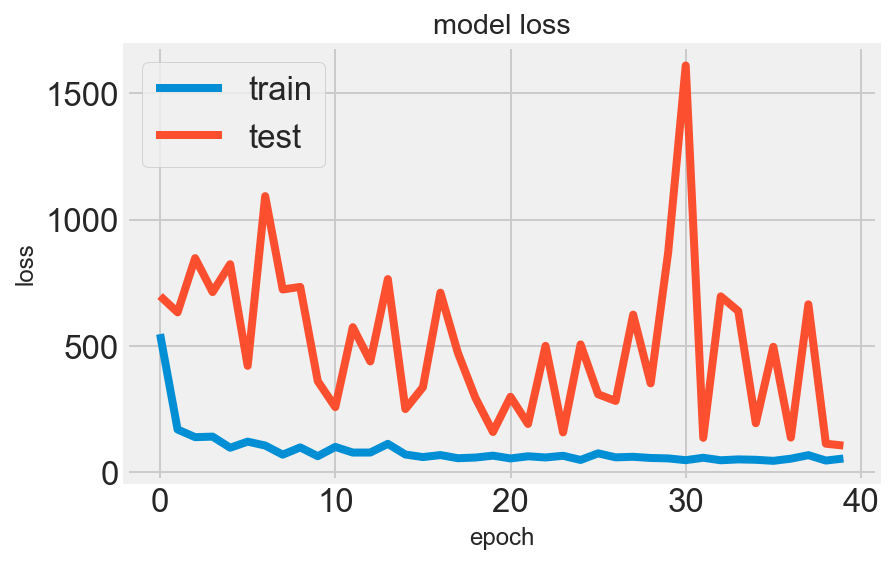

In [303]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)

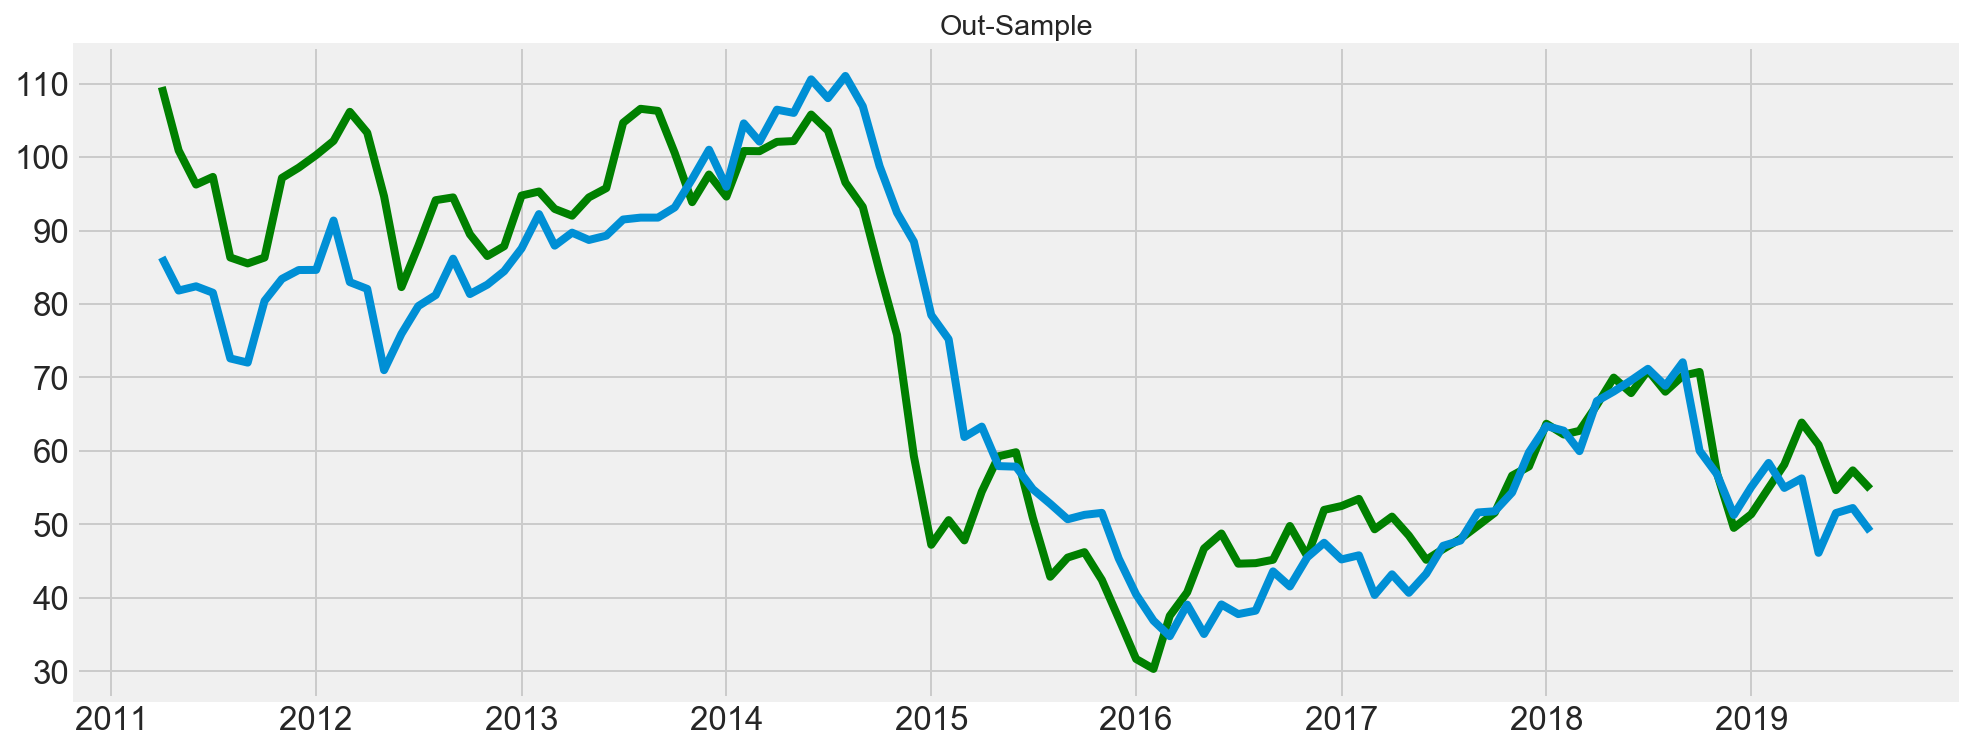

In [305]:
plt.figure(figsize=(15, 6))
plt.title('Out-Sample')
plt.plot(y_test.index, y_test, color='green')
plt.plot(y_test.index, pred)

In [306]:
pred = model.predict(X_train)

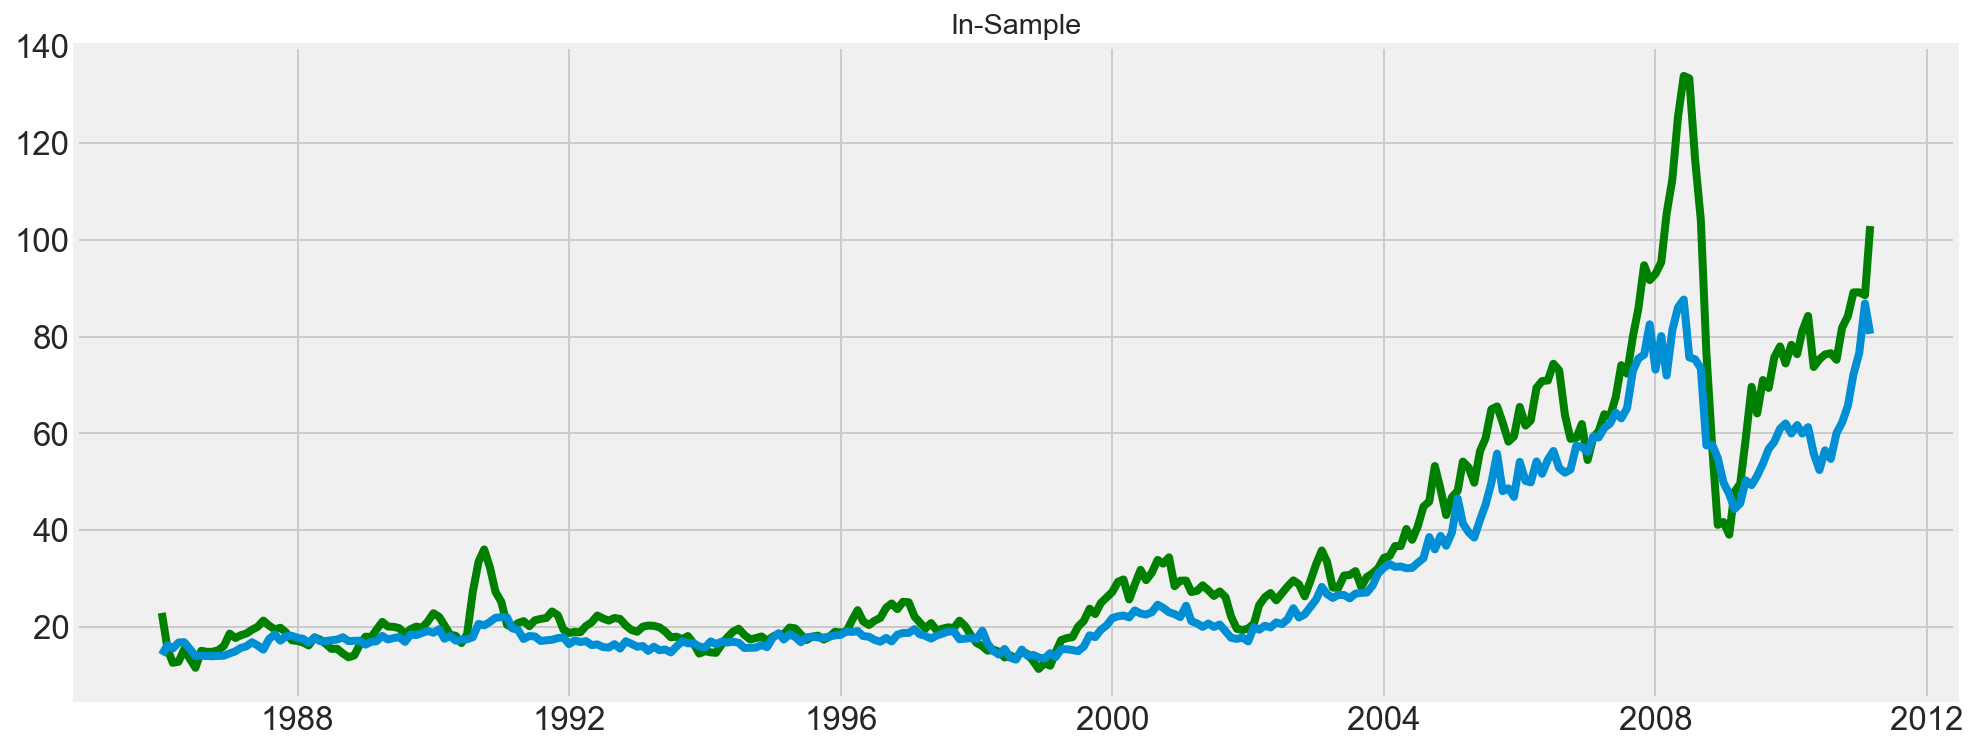

In [307]:
plt.figure(figsize=(15, 6))
plt.title('In-Sample')
plt.plot(y_train.index, y_train, color='green')
plt.plot(y_train.index, pred)

In [308]:
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

106.15802408326843

In [309]:
pred_df = pd.DataFrame({'WTI Price': list(pred.flatten())})
pred_df.set_index(X_test.index)
pred_df.head()

,WTI Price
0,86.333138
1,81.829941
2,82.406708
3,81.530869
4,72.590569


In [310]:
y_test.head()

,WTI_Price
Date,
2011-04-01,109.53
2011-05-01,100.90
2011-06-01,96.26
2011-07-01,97.30
2011-08-01,86.33


In [311]:
mean_absolute_error(y_test, pred)

7.797887178930906

In [312]:
math.sqrt(mean_squared_error(y_test, pred))

10.3033016108075

In [313]:
error = rmse(y_test, pred_df)
print(f'RMSE Error: {error}')

RMSE Error: [10.30330161]


## Evaluate the Results

In [219]:
evaluation

,Model,MSE,RMSE,Description
0,ARIMA,118.933558,10.905666,"RIMA(2,1,2)"
1,SARIMA,52.960715,7.277411,"SARIMA(2,1,2)(2,0,0,12)"
2,RNN,513.284733,22.655788,LSTM
3,SARIMAX,74.764488,8.646646,"SARIMAX(2, 1, 2)(2, 0, 0, 12)"
4,VAR,841.184463,29.003180,


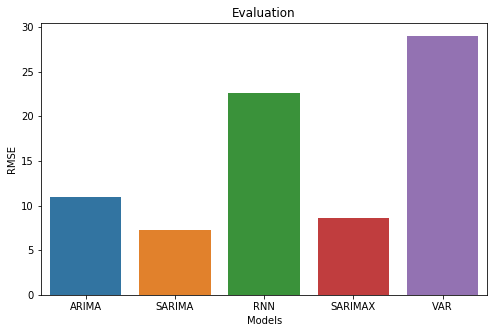

In [220]:
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=evaluation['Model'], y=evaluation['RMSE'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Evaluation');

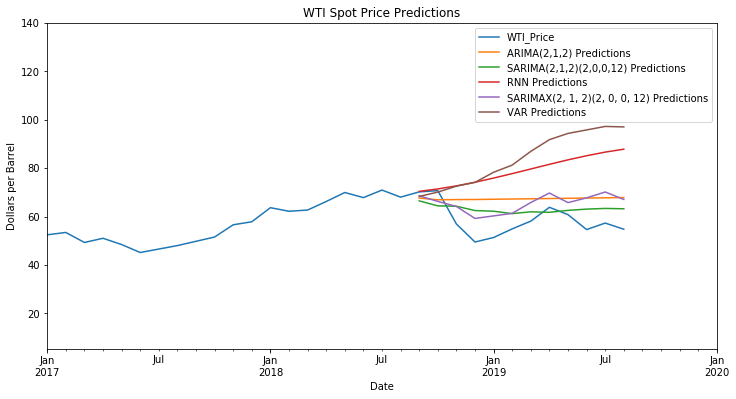

In [221]:
# Plot predictions against known values
title = 'WTI Spot Price Predictions'
ylabel='Dollars per Barrel'

ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
ARIMA_predictions.plot(legend=True)
SARIMA_predictions.plot(legend=True)
RNN_predictions.plot(legend=True)
SARIMAX_predictions.plot(legend=True)
VAR_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);
ax.set_xlim(['20170101 00:00:00', '20200101 00:00:00']);

As you can see the best performing model is SARIMA and SARIMAX with RMSE= 7.2 and 8.6, so SARIMA will be used to forecast future values of oil price as we can not use SARIMAX to forecast becuse it need the X features values and we did not have these values nor develop models to predect them.

# Forecast

### Retrain the model on the full data, and forecast the future

In [222]:
SARIMA_f_model = SARIMAX(df['WTI_Price'],order=(2,1,2),seasonal_order=(2,0,0,12))
SARIMA_f_results = SARIMA_f_model.fit()
SARIMA_fcast = SARIMA_f_results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,2)(2,0,0,12) Forecast')

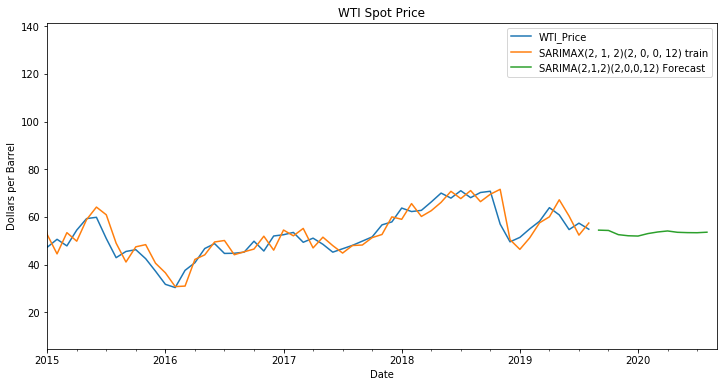

In [223]:
# Plot predictions against known values
title = 'WTI Spot Price'
ylabel='Dollars per Barrel'

ax = df['WTI_Price'].plot(legend=True,figsize=(12,6),title=title)
SARIMA_f_results.fittedvalues[1:].rename('SARIMAX(2, 1, 2)(2, 0, 0, 12) train').plot(legend=True)
SARIMA_fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);
ax.set_xlim(['20150101 00:00:00', '20200901 00:00:00']);

# Conclusion

Oil prices forecasting considers one of the most challenging problems due to the high volatility of oil prices. However, after implementing this project we can say that oil price affected by many factor. so to build a more reliable model we have to consider these factors.

It is good to mention that on October 2019 KAPSARC published a paper "A Short-Term Forecasting Model for Brent Oil Prices". In their work they use publicly available data on 195 countries and regions to develop detailed country- and region-specific statistical models of oil demand, supply, inventories and oil prices. 

KOMO takes a critical look at all of the major factors affecting world
oil markets, including:
- financial variables such as interest rates and gross domestic product (GDP);
- seasonal variables, such as regional temperatures;
- physical production considerations, such as reservoir characteristics for conventional and unconventional oil;
- investment decisions and timelines;
- the influence of trading and speculation;
- and geopolitical factors such as trade wars,
- sanctions, and complex international relations.

They develop 5 models to predict the factor that affect oil prices then forecast the prices witch are demand model, supply model ,crude oil inventory and price forecasting model, Delphi survey model for geopolitical risk and the Brent crude oil confidence interval model.
![title](KOMO.png)